**Economic Freedom: A Data Mining Approach**

Andrés José Basile Álvarez

andresbasilealvarez@gmail.com

**Data Source:*
https://www.heritage.org/index/download

Data Source Description:

- The information is composed by the following fields: CountryID, Country Name, WEBNAME, Region, World Rank, Region Rank, 2019 Score, Property Rights, Judical Effectiveness, Government Integrity, Tax Burden, Gov't Spending, Fiscal Health, Business Freedom, Labor Freedom, Monetary Freedom, Trade Freedom, Investment Freedom, Financial Freedom, Tariff Rate (%), Income Tax Rate (%), Corporate Tax Rate (%), Tax Burden % of GDP, Gov't Expenditure % of GDP , Country, Population (Millions), "GDP (Billions, PPP)", GDP Growth Rate (%), 5 Year GDP Growth Rate (%), GDP per Capita (PPP), Unemployment (%), Inflation (%), FDI Inflow (Millions), Public Debt (% of GDP). Those which do not specify being percentual units or other type of unit (millions, billions, etc.), represent values from 0 to 100, except for the ranking fields.

In [2]:
import pandas as pd                    
import numpy as np                     
import matplotlib.pyplot as plt       
import seaborn as sns                  
%matplotlib inline

In [3]:

dir_Happiness2018 = 'Data/HappinessIndex2018.xls'
dir_Happiness2019 = 'Data/HappinessIndex2019.xls'
dir_Happiness2020 = 'Data/HappinessIndex2020.xls'
dir_Happiness2021 = 'Data/HappinessIndex2021.xls'
dir_Happiness2022 = 'Data/HappinessIndex2022.xls'

dir_CrimeRate2022 = 'Data/CrimeRate2022.xls'
dir_CrimeRate2021 = 'Data/CrimeRate2021.xls'
dir_CrimeRate2020 = 'Data/CrimeRate2020.xls'
dir_CrimeRate2019 = 'Data/CrimeRate2019.xls'
dir_CrimeRate2018 = 'Data/CrimeRate2018.xls'

dir_EconFreedom2018 = 'Data/index2018_data.xls'
dir_EconFreedom2019 = 'Data/index2019_data.xls'
dir_EconFreedom2020 = 'Data/index2020_data.xls'
dir_EconFreedom2021 = 'Data/index2021_data.xls'
dir_EconFreedom2022 = 'Data/index2022_data.xls'

In [4]:
DatosHappiness2022 = pd.read_excel(dir_Happiness2022)
DatosHappiness2021 = pd.read_excel(dir_Happiness2021)
DatosHappiness2020 = pd.read_excel(dir_Happiness2020)
DatosHappiness2019 = pd.read_excel(dir_Happiness2019)
DatosHappiness2018 = pd.read_excel(dir_Happiness2018)

DatosCrimeRate2022 = pd.read_excel(dir_CrimeRate2022)
DatosCrimeRate2021 = pd.read_excel(dir_CrimeRate2021)
DatosCrimeRate2020 = pd.read_excel(dir_CrimeRate2020)
DatosCrimeRate2019 = pd.read_excel(dir_CrimeRate2019)
DatosCrimeRate2018 = pd.read_excel(dir_CrimeRate2018)

DatosEconFreedom2022 = pd.read_excel(dir_EconFreedom2022)
DatosEconFreedom2021 = pd.read_excel(dir_EconFreedom2021)
DatosEconFreedom2020 = pd.read_excel(dir_EconFreedom2020)
DatosEconFreedom2019 = pd.read_excel(dir_EconFreedom2019)
DatosEconFreedom2018 = pd.read_excel(dir_EconFreedom2018)


ArrDataHappiness = {'2018':DatosHappiness2018, '2019':DatosHappiness2019, '2020':DatosHappiness2020, '2021':DatosHappiness2021, '2022':DatosHappiness2022}
ArrDataCrimeRate = {'2018':DatosCrimeRate2018, '2019':DatosCrimeRate2019, '2020':DatosCrimeRate2020, '2021':DatosCrimeRate2021, '2022':DatosCrimeRate2022}
ArrDataEconFreedom = {'2018':DatosEconFreedom2018, '2019':DatosEconFreedom2019, '2020':DatosEconFreedom2020, '2021':DatosEconFreedom2021, '2022':DatosEconFreedom2022}

# for year,DataEconFreedom in ArrDataEconFreedom.items():
#     print(year, DataEconFreedom)

DatosEconFreedom2018

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2018 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,154.0,38.0,51.3,17.9,28.2,26.2,...,Afghanistan,33.400,64.081,1.5,4.3882,1918.6,8.54,4.384,99.569,8.271
1,2,Albania,Albania,Europe,65.0,32.0,64.5,54.1,25.4,39.9,...,Albania,2.885,34.155,2.6,2.0478,11840.2,16.333,1.275,1124.35,71.536
2,3,Algeria,Algeria,Middle East / North Africa,172.0,14.0,44.7,27.8,35.2,29.0,...,Algeria,40.762,612.513,3.7,3.5802,15026.5,11.222,6.398,1546,20.356
3,4,Angola,Angola,Sub-Saharan Africa,164.0,40.0,48.6,36.0,25.4,18.9,...,Angola,27.360,187.261,3,3.9560,6844.43,6.579,32.378,14363.6,71.883
4,5,Argentina,Argentina,Americas,144.0,26.0,52.3,40.8,44.5,32.6,...,Argentina,43.600,874.072,1.2,-0.1570,20047.5,6.557,58.400,5745.18,51.269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,182,Zambia,Zambia,Sub-Saharan Africa,132.0,23.0,54.3,46.0,40.6,36.3,...,Zambia,16.717,64.867,3.6,4.6480,3880.31,7.53,17.900,468.538,53.109
182,183,Zimbabwe,Zimbabwe,Sub-Saharan Africa,174.0,44.0,44.0,27.6,33.0,18.9,...,Zimbabwe,14.501,28.571,1.5,4.1070,1970.26,5.09,-1.566,319.413,75.318
183,184,Somalia,Somalia,Sub-Saharan Africa,NaN,NaN,NaN,33.1,25.4,17.8,...,Somalia,10.800,$5.9 (2015 nominal),3.7,NaN,NaN,6.62,NaN,339,NaN
184,185,Kosovo,Kosovo,Europe,56.0,27.0,66.6,52.3,59.0,45.4,...,Kosovo,1.900,18.442,3.3,3.0334,"$9,600 (estimated)",NaN,0.273,249.0 (2014 net),20.577


In [5]:
for year,DataEconFreedom in ArrDataEconFreedom.items():
    print(year, DataEconFreedom.info())
    
for year,DataHappiness in ArrDataHappiness.items():
    print(year, DataHappiness.info())
    
for year,DataCrimeRate in ArrDataCrimeRate.items():
    print(year, DataCrimeRate.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CountryID                   186 non-null    int64  
 1   Country Name                186 non-null    object 
 2   WEBNAME                     186 non-null    object 
 3   Region                      186 non-null    object 
 4   World Rank                  180 non-null    float64
 5   Region Rank                 180 non-null    float64
 6   2018 Score                  180 non-null    float64
 7   Property Rights             185 non-null    float64
 8   Judical Effectiveness       185 non-null    float64
 9   Government Integrity        185 non-null    float64
 10  Tax Burden                  181 non-null    float64
 11  Gov't Spending              183 non-null    float64
 12  Fiscal Health               184 non-null    float64
 13  Business Freedom            184 non

In [6]:
for year,DataEconFreedom in ArrDataEconFreedom.items():
    print(year, DataEconFreedom.isnull().sum())
    
for year,DataHappiness in ArrDataHappiness.items():
    print(year, DataHappiness.isnull().sum())
    
for year,DataCrimeRate in ArrDataCrimeRate.items():
    print(year, DataCrimeRate.isnull().sum())

2018 CountryID                     0
Country Name                  0
WEBNAME                       0
Region                        0
World Rank                    6
Region Rank                   6
2018 Score                    6
Property Rights               1
Judical Effectiveness         1
Government Integrity          1
Tax Burden                    5
Gov't Spending                3
Fiscal Health                 2
Business Freedom              2
Labor Freedom                 2
Monetary Freedom              2
Trade Freedom                 3
Investment Freedom            2
Financial Freedom             5
Tariff Rate (%)               3
Income Tax Rate (%)           2
Corporate Tax Rate (%)        2
Tax Burden % of GDP           6
GovtExpenditure%ofGDP         4
Country                       0
Population (Millions)         0
GDP (Billions, PPP)           0
GDP Growth Rate (%)           0
5 Year GDP Growth Rate (%)    4
GDP per Capita (PPP)          3
Unemployment (%)              5
Inf

In [7]:
DatosEconFreedom2022 = DatosEconFreedom2022.dropna()
DatosEconFreedom2021 = DatosEconFreedom2021.dropna()
DatosEconFreedom2020 = DatosEconFreedom2020.dropna()
DatosEconFreedom2019 = DatosEconFreedom2019.dropna()
DatosEconFreedom2018 = DatosEconFreedom2018.dropna()

In [8]:
DatosEconFreedomNum2022 = DatosEconFreedom2022.drop(columns=['World Rank','CountryID','WEBNAME', 'Region', 'Unnamed: 20', 'Unnamed: 24', 'Unnamed: 27', 'Country','Region Rank', 'Property Rights', 'Judical Effectiveness', 'Government Integrity','Tax Burden','Gov\'t Spending','Fiscal Health','Business Freedom','Labor Freedom','Monetary Freedom','Trade Freedom','Financial Freedom'])
DatosEconFreedomNum2022 = DatosEconFreedomNum2022.rename(columns={'Country Name': 'Country'})

DatosEconFreedomNum2021 = DatosEconFreedom2021.drop(columns=['World Rank','CountryID',  'WEBNAME', 'Region', 'Country','Region Rank', 'Property Rights', 'Judical Effectiveness', 'Government Integrity','Tax Burden','Gov\'t Spending','Fiscal Health','Business Freedom','Labor Freedom','Monetary Freedom','Trade Freedom','Financial Freedom'])
DatosEconFreedomNum2021 = DatosEconFreedomNum2021.rename(columns={'Country Name': 'Country'})

DatosEconFreedomNum2020 = DatosEconFreedom2020.drop(columns=['World Rank','CountryID',  'WEBNAME', 'Region', 'Country','Region Rank', 'Property Rights', 'Judical Effectiveness', 'Government Integrity','Tax Burden','Gov\'t Spending','Fiscal Health','Business Freedom','Labor Freedom','Monetary Freedom','Trade Freedom','Financial Freedom'])
DatosEconFreedomNum2020 = DatosEconFreedomNum2020.rename(columns={'Country Name': 'Country'})

DatosEconFreedomNum2019 = DatosEconFreedom2019.drop(columns=['World Rank', 'CountryID', 'WEBNAME', 'Region', 'Country','Region Rank', 'Property Rights', 'Judical Effectiveness', 'Government Integrity','Tax Burden','Gov\'t Spending','Fiscal Health','Business Freedom','Labor Freedom','Monetary Freedom','Trade Freedom','Financial Freedom'])
DatosEconFreedomNum2019 = DatosEconFreedomNum2019.rename(columns={'Country Name': 'Country'})

DatosEconFreedomNum2018 = DatosEconFreedom2018.drop(columns=['World Rank', 'CountryID', 'WEBNAME', 'Region', 'Country','Region Rank', 'Property Rights', 'Judical Effectiveness', 'Government Integrity','Tax Burden','Gov\'t Spending','Fiscal Health','Business Freedom','Labor Freedom','Monetary Freedom','Trade Freedom','Financial Freedom'])
DatosEconFreedomNum2018 = DatosEconFreedomNum2018.rename(columns={'Country Name': 'Country'})

In [9]:
DatosHappiness2022 = DatosHappiness2022.loc[:, [ 'Country', 'Happiness score']]
DatosHappiness2021 = DatosHappiness2021.loc[:, [ 'Country', 'Happiness score']]
DatosHappiness2020 = DatosHappiness2020.loc[:, [ 'Country', 'Happiness score']]
DatosHappiness2019 = DatosHappiness2019.loc[:, [ 'Country', 'Happiness score']]
DatosHappiness2018 = DatosHappiness2018.loc[:, [ 'Country', 'Happiness score']]

In [10]:
mergedData2022 = pd.merge(DatosHappiness2022, DatosEconFreedomNum2022, on='Country')
mergedData20222 = pd.merge(mergedData2022, DatosCrimeRate2022, on='Country')

mergedData2021 = pd.merge(DatosHappiness2021, DatosEconFreedomNum2021, on='Country')
mergedData20212 = pd.merge(mergedData2021, DatosCrimeRate2021, on='Country')

mergedData2020 = pd.merge(DatosHappiness2020, DatosEconFreedomNum2020, on='Country')
mergedData20202 = pd.merge(mergedData2020, DatosCrimeRate2020, on='Country')

mergedData2019 = pd.merge(DatosHappiness2019, DatosEconFreedomNum2019, on='Country')
mergedData20192 = pd.merge(mergedData2019, DatosCrimeRate2019, on='Country')

mergedData2018 = pd.merge(DatosHappiness2018, DatosEconFreedomNum2018, on='Country')
mergedData20182 = pd.merge(mergedData2018, DatosCrimeRate2018, on='Country')

ArrMergedData = {'2018':mergedData20182, '2019':mergedData20192, '2020':mergedData20202, '2021':mergedData20212,'2022':mergedData20222}
# mergedData20222.loc[mergedData20222['Country']=='Mexico']




 2018


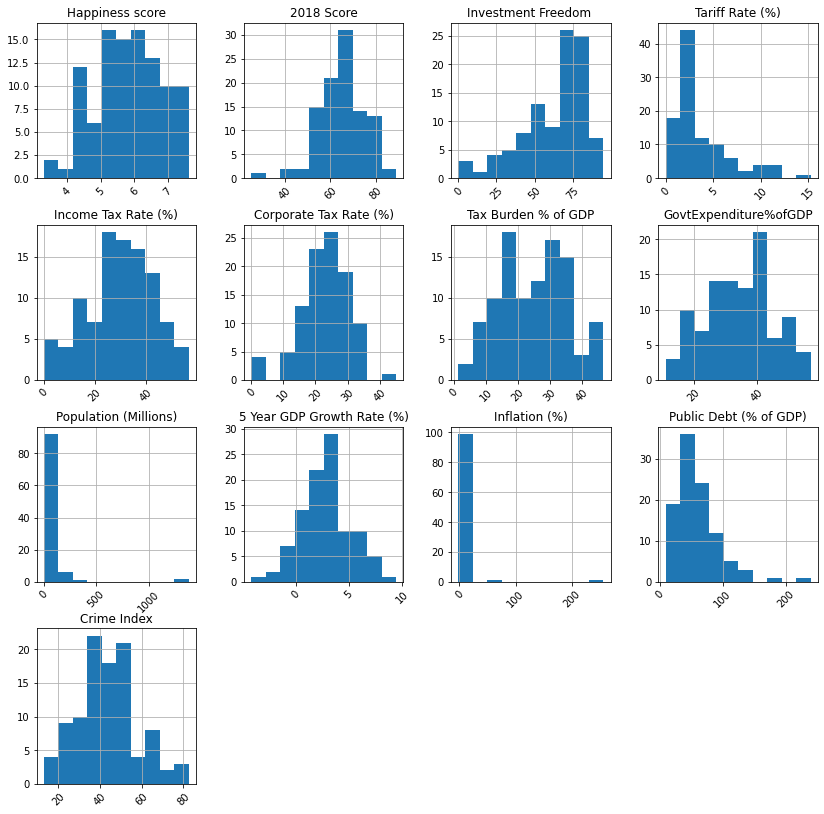




 2019


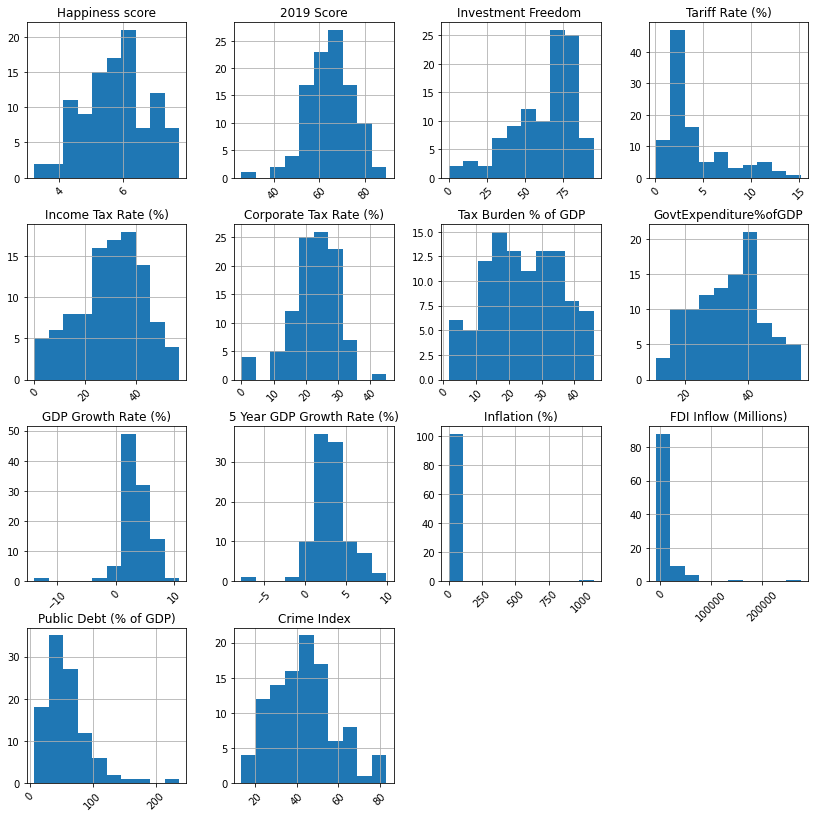




 2020


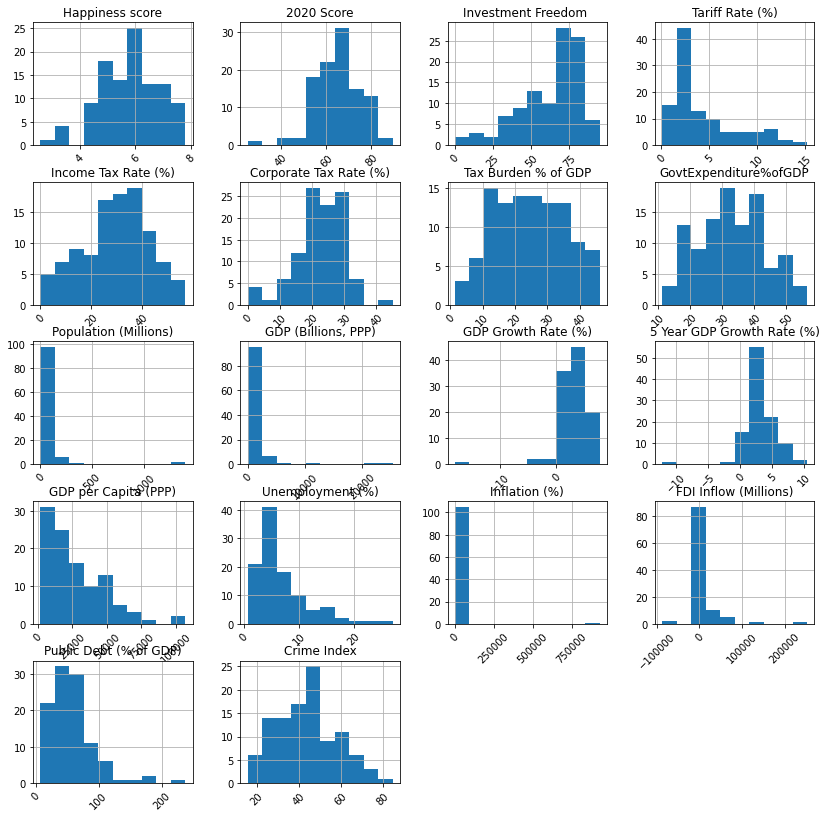




 2021


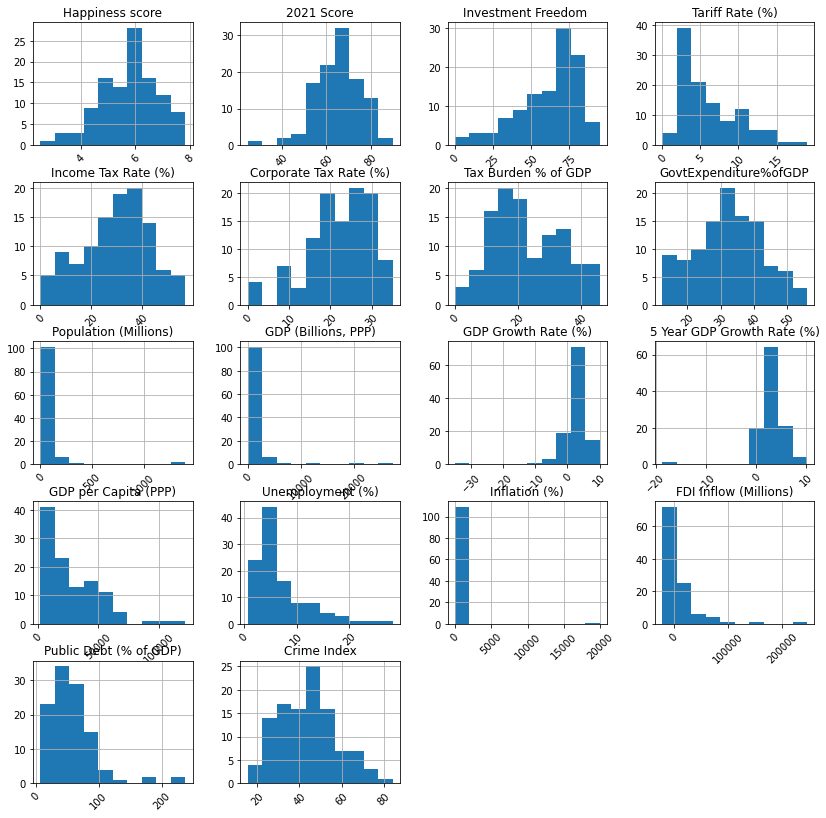




 2022


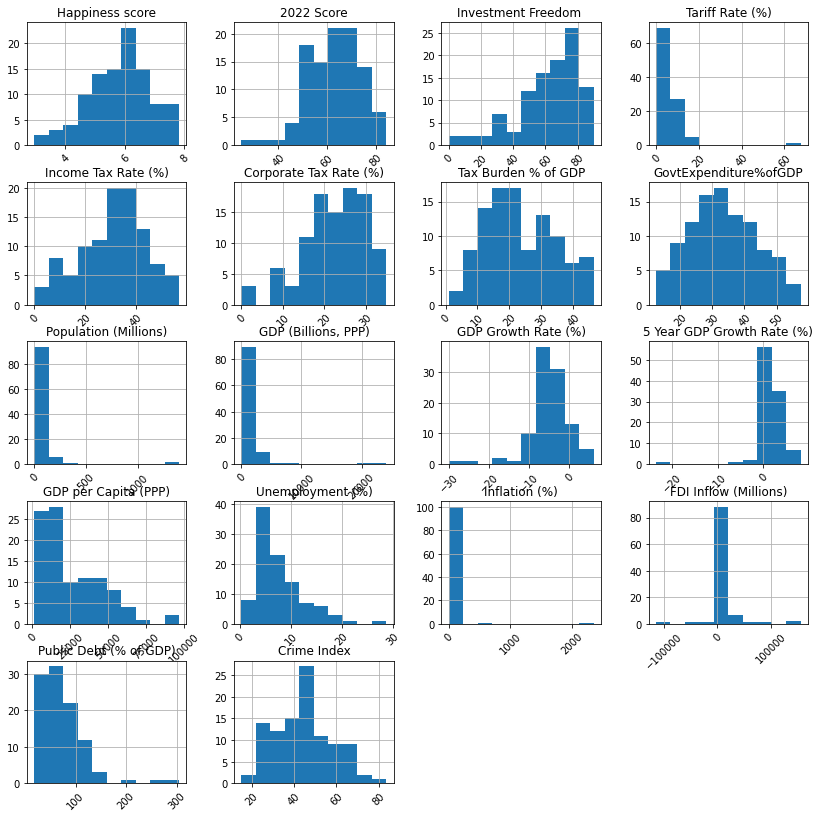

In [11]:
for year,MergedData in ArrMergedData.items():
    print('\n\n\n',year)
    plt.show(year, MergedData.hist(figsize=(14,14), xrot=45))






 2018


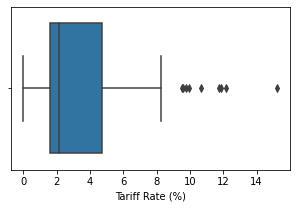

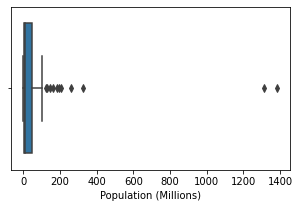

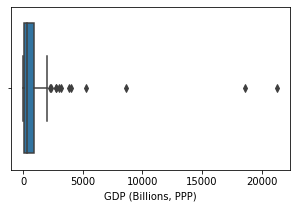

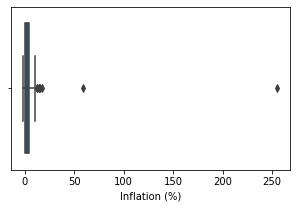

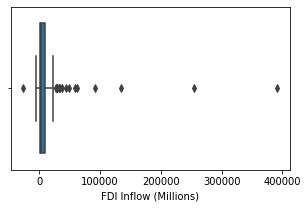




 2019


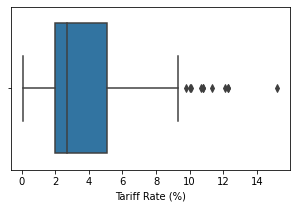

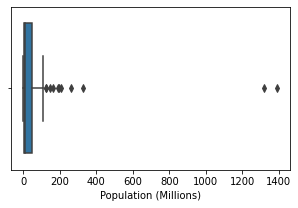

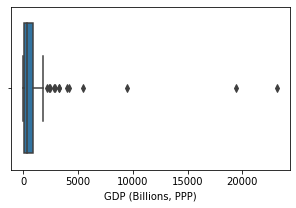

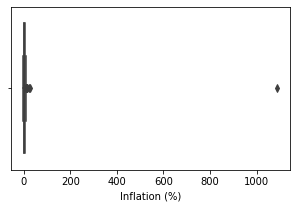

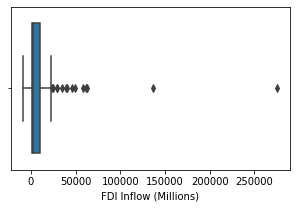




 2020


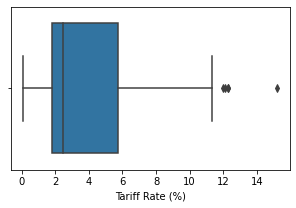

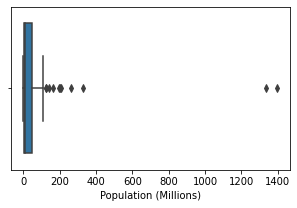

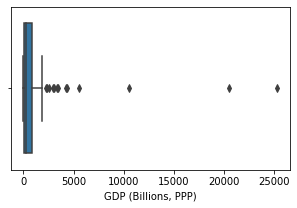

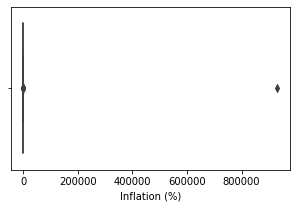

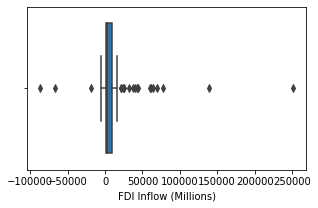




 2021


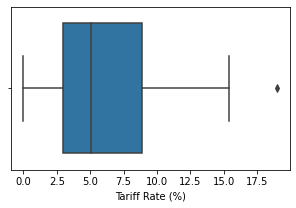

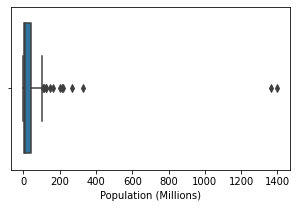

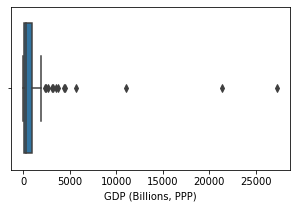

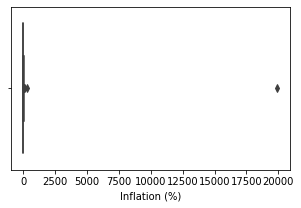

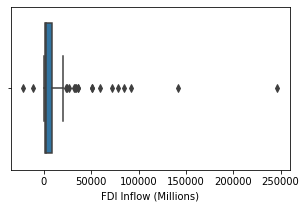




 2022


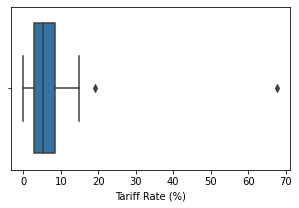

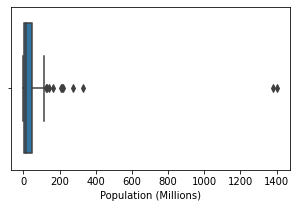

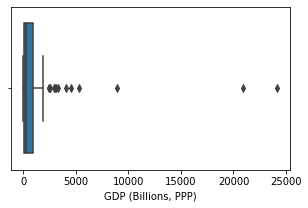

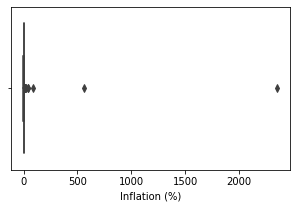

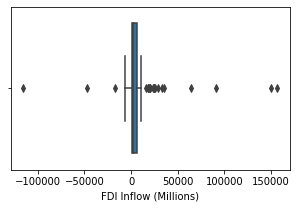

In [12]:
AtypicVariablesVal = ['Tariff Rate (%)', 'Population (Millions)', 'GDP (Billions, PPP)', 'Inflation (%)', 'FDI Inflow (Millions)']

for year,MergedData in ArrMergedData.items():
    print("\n\n\n", year)
    for col in AtypicVariablesVal:
      plt.figure(figsize = (5,3))
      sns.boxplot(x=col, data=MergedData)
      plt.show()

In [13]:
#Analysis of out of range data (possible mistakes) Columns of importance: Tariff Rate, Population, GDP, Inflation, FDI Inflow
for year,MergedData in ArrMergedData.items():
    print('\n\n\n', year)
    print(MergedData.max())
    




 2018
Country                       Zimbabwe
Happiness score                 7.6321
2018 Score                        88.8
Investment Freedom                  95
Tariff Rate (%)                  15.23
Income Tax Rate (%)                 57
Corporate Tax Rate (%)              45
Tax Burden % of GDP             46.622
GovtExpenditure%ofGDP          57.0543
Population (Millions)          1382.71
GDP (Billions, PPP)            21291.8
GDP Growth Rate (%)               10.2
5 Year GDP Growth Rate (%)      9.4612
GDP per Capita (PPP)            127660
Unemployment (%)                25.927
Inflation (%)                  254.949
FDI Inflow (Millions)           391104
Public Debt (% of GDP)         239.184
Crime Index                       82.6
dtype: object



 2019
Country                       Zimbabwe
Happiness score                 7.7689
2019 Score                        89.4
Investment Freedom                  95
Tariff Rate (%)                   15.2
Income Tax Rate (%)             

In [14]:
for year,MergedData in ArrMergedData.items():
    print("\n#################################\n", year, "\n#################################")
    print('\n\n####### Tariff Rate %')
    print(MergedData.loc[MergedData["Tariff Rate (%)"].values>20])
    print('\n\n####### Population')
    print(MergedData.loc[MergedData["Population (Millions)"].values>700])
    print('\n\n####### GDP')
    print(MergedData.loc[MergedData["GDP (Billions, PPP)"].values>10000])
    print('\n\n####### Inflation %')
    print(MergedData.loc[MergedData["Inflation (%)"].values>100])
    print('\n\n####### FDI Inflow %')
    print(MergedData.loc[MergedData["FDI Inflow (Millions)"].values>50000])


#################################
 2018 
#################################


####### Tariff Rate %
Empty DataFrame
Columns: [Country, Happiness score, 2018 Score, Investment Freedom , Tariff Rate (%), Income Tax Rate (%), Corporate Tax Rate (%), Tax Burden % of GDP, GovtExpenditure%ofGDP, Population (Millions), GDP (Billions, PPP), GDP Growth Rate (%), 5 Year GDP Growth Rate (%), GDP per Capita (PPP), Unemployment (%), Inflation (%), FDI Inflow (Millions), Public Debt (% of GDP), Crime Index]
Index: []


####### Population
   Country  Happiness score  2018 Score  Investment Freedom   Tariff Rate (%)  \
72   China           5.2458        57.8                 25.0             3.41   
97   India           4.1898        54.5                 40.0             6.30   

    Income Tax Rate (%)  Corporate Tax Rate (%)  Tax Burden % of GDP  \
72                 45.0                   25.00                 17.5   
97                 30.9                   32.44                  7.2   

    GovtE

   Country  Happiness score  2022 Score  Investment Freedom   Tariff Rate (%)  \
61   China           5.5853        48.0                 20.0              3.4   
97   India           3.7771        53.9                 40.0              7.0   

    Income Tax Rate (%)  Corporate Tax Rate (%)  Tax Burden % of GDP  \
61                 45.0                    25.0                15.19   
97                 30.9                    32.4                 6.81   

    GovtExpenditure%ofGDP  Population (Millions)  GDP (Billions, PPP)  \
61              34.523000            1402.112000            24142.830   
97              28.156333            1380.004385             8907.116   

    GDP Growth Rate (%)  5 Year GDP Growth Rate (%)  GDP per Capita (PPP)  \
61                2.270                      5.7268             17191.694   
97               -7.965                      3.5322              6461.009   

    Unemployment (%)  Inflation (%)  FDI Inflow (Millions)  \
61              5.00     

In [15]:
# Deleting registries with atypical values

# for year,MergedData in ArrMergedData.items():
#     MergedData.drop(MergedData.loc[MergedData['Country']=='Venezuela'].index, inplace=True)
#     MergedData.drop(MergedData.loc[MergedData['Country']=='Zimbabwe'].index, inplace=True)

# # Verifying correct deletion of values
# for year,MergedData in ArrMergedData.items():
#     print("#### Year: ", year)
#     print(MergedData.loc[MergedData['Country']=='Venezuela'] | MergedData['Country']=='Zimbabwe')

In [16]:
CorrEconFreedom2022 = mergedData20222.corr(method='pearson')
CorrEconFreedom2021 = mergedData20212.corr(method='pearson')
CorrEconFreedom2020 = mergedData20202.corr(method='pearson')
CorrEconFreedom2019 = mergedData20192.corr(method='pearson')
CorrEconFreedom2018 = mergedData20182.corr(method='pearson')

ArrCorrMergedData = {'2018':CorrEconFreedom2018, '2019':CorrEconFreedom2019, '2020':CorrEconFreedom2020, '2021':CorrEconFreedom2021,'2022':CorrEconFreedom2022}





 2018


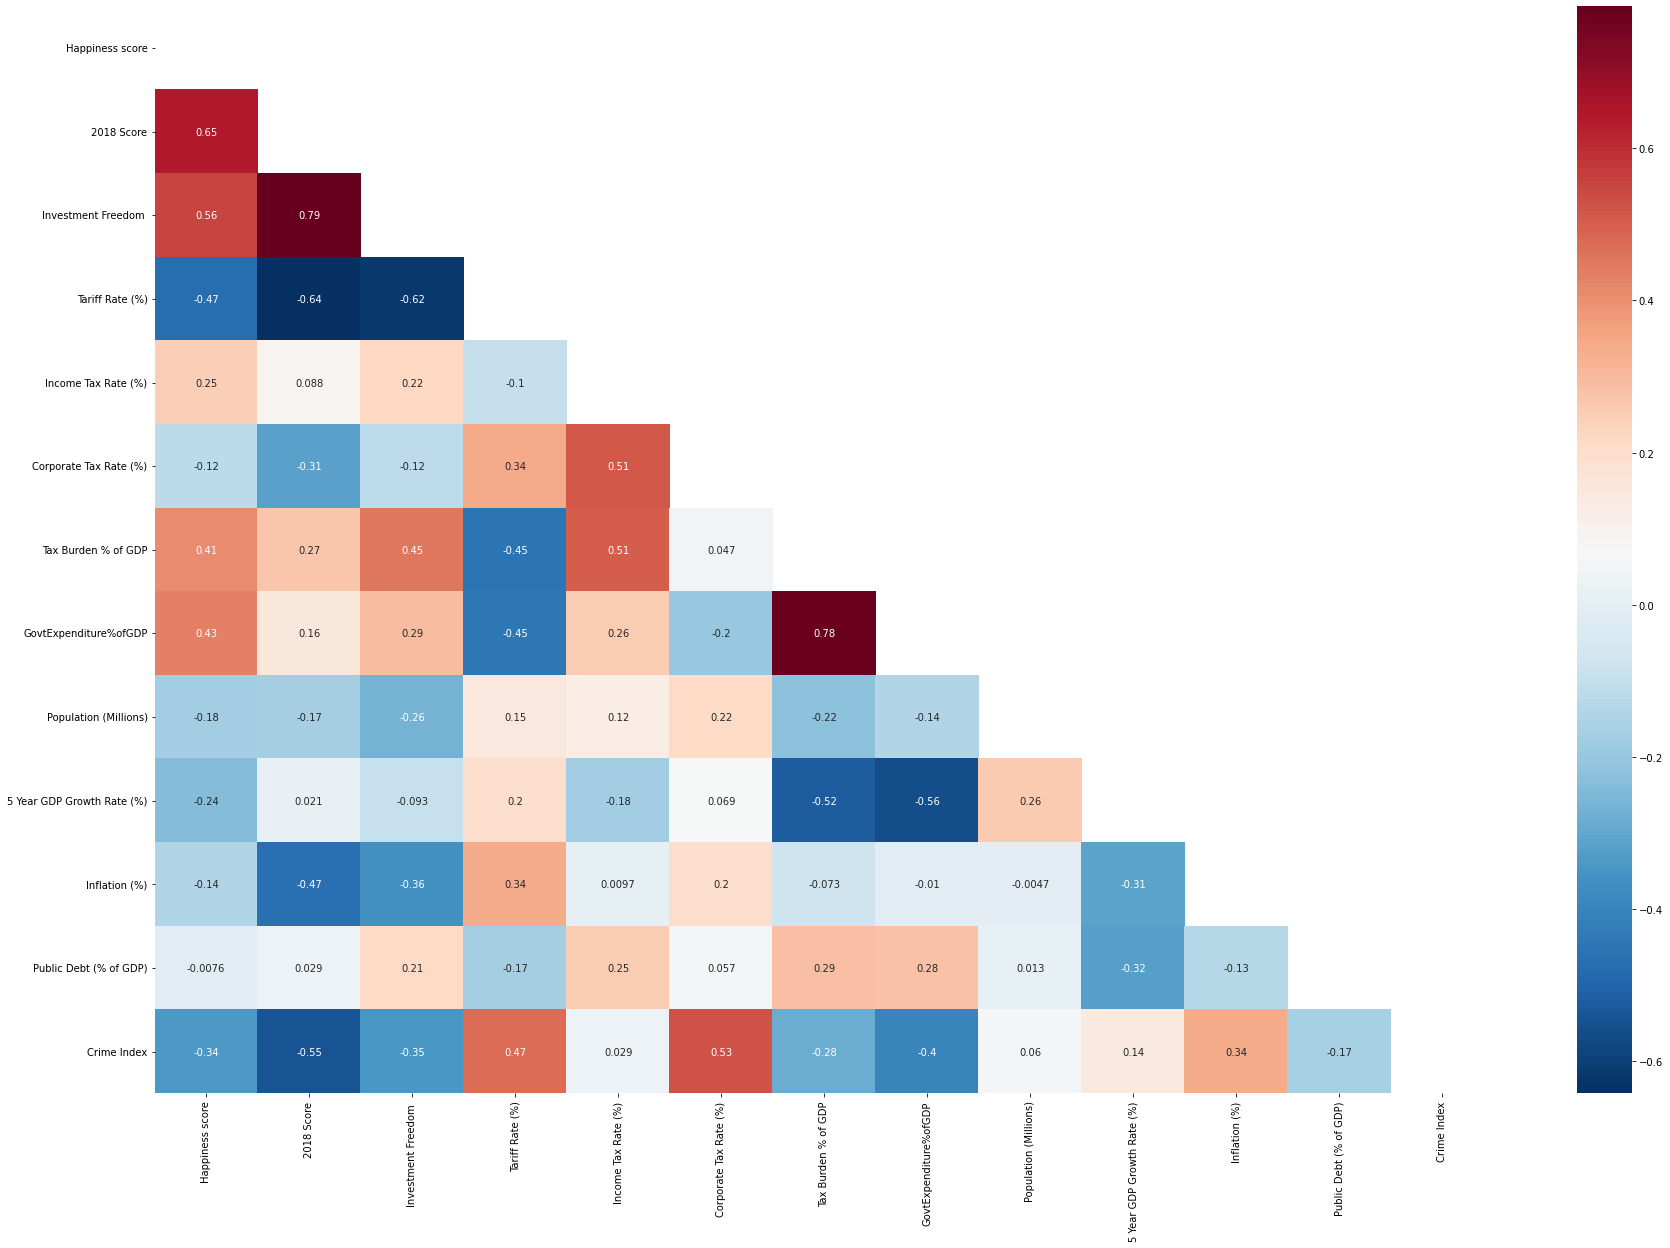





 2019


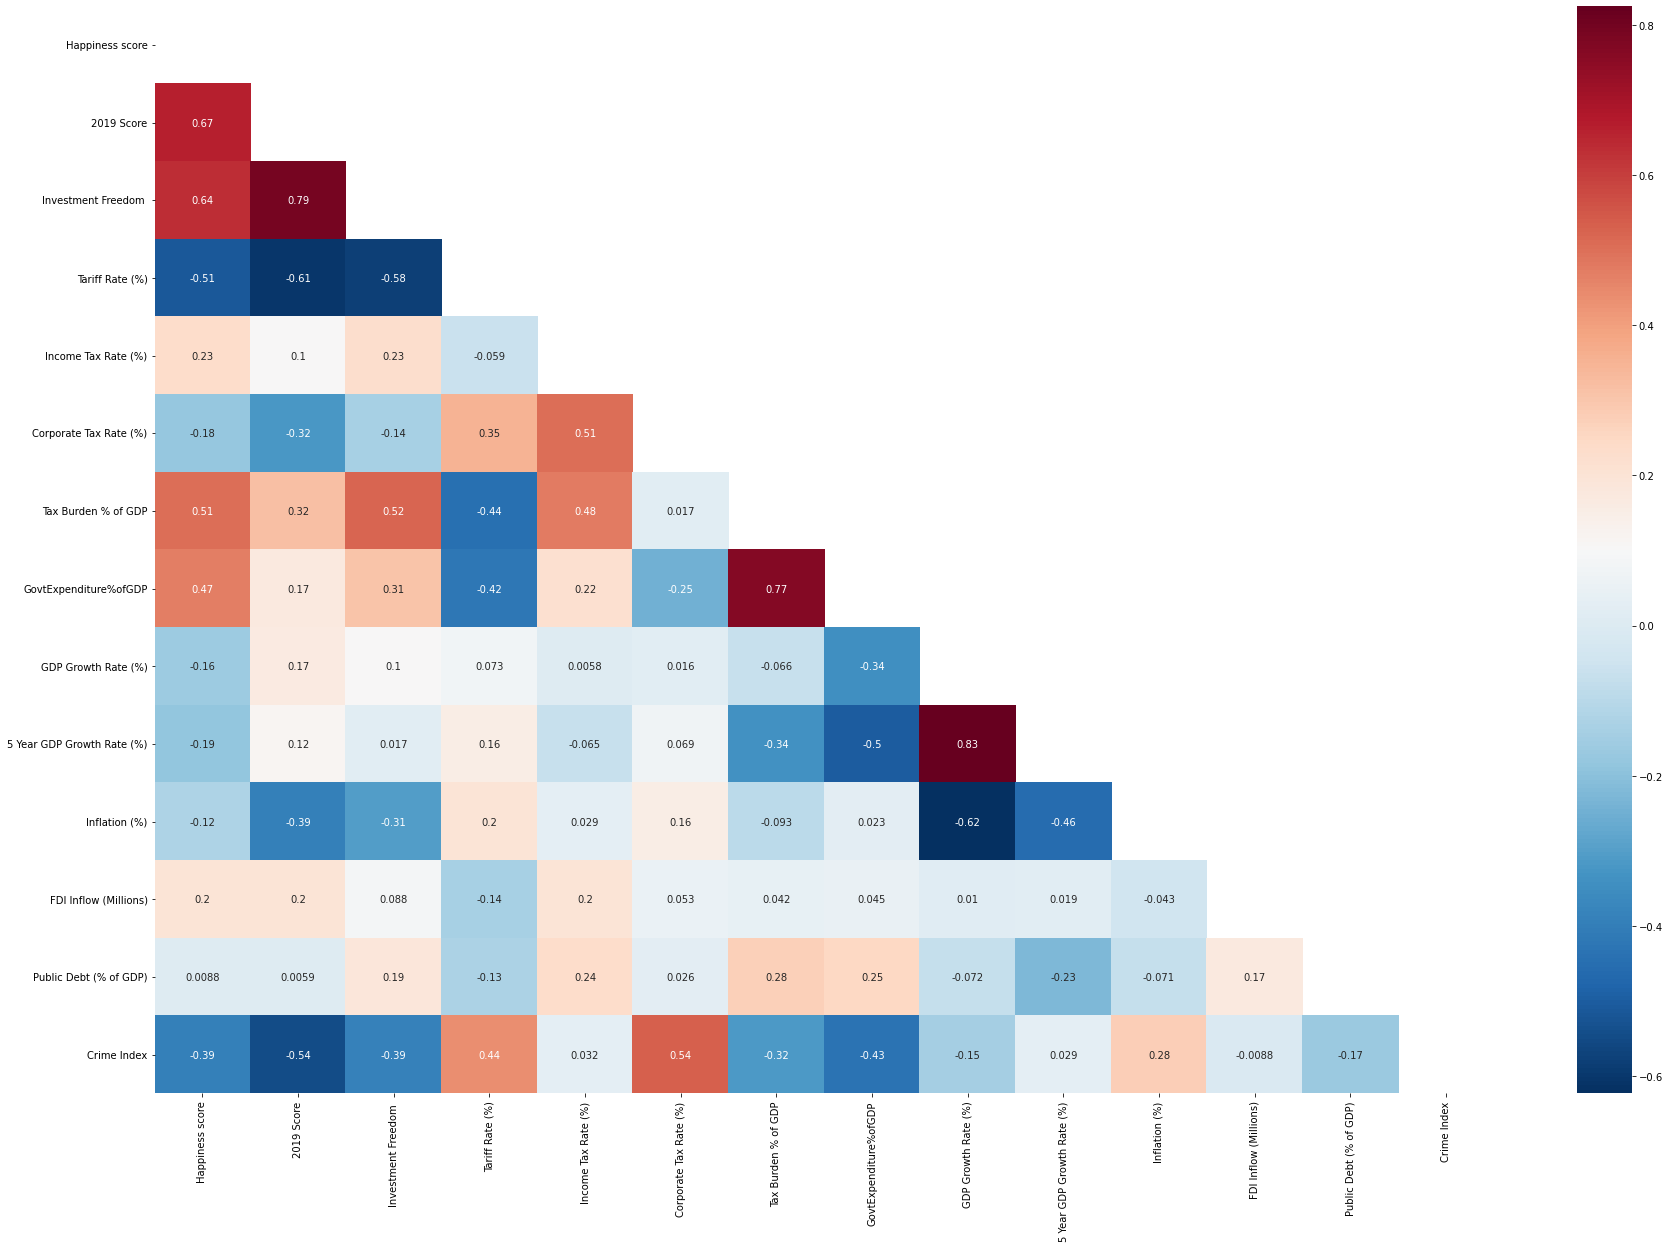





 2020


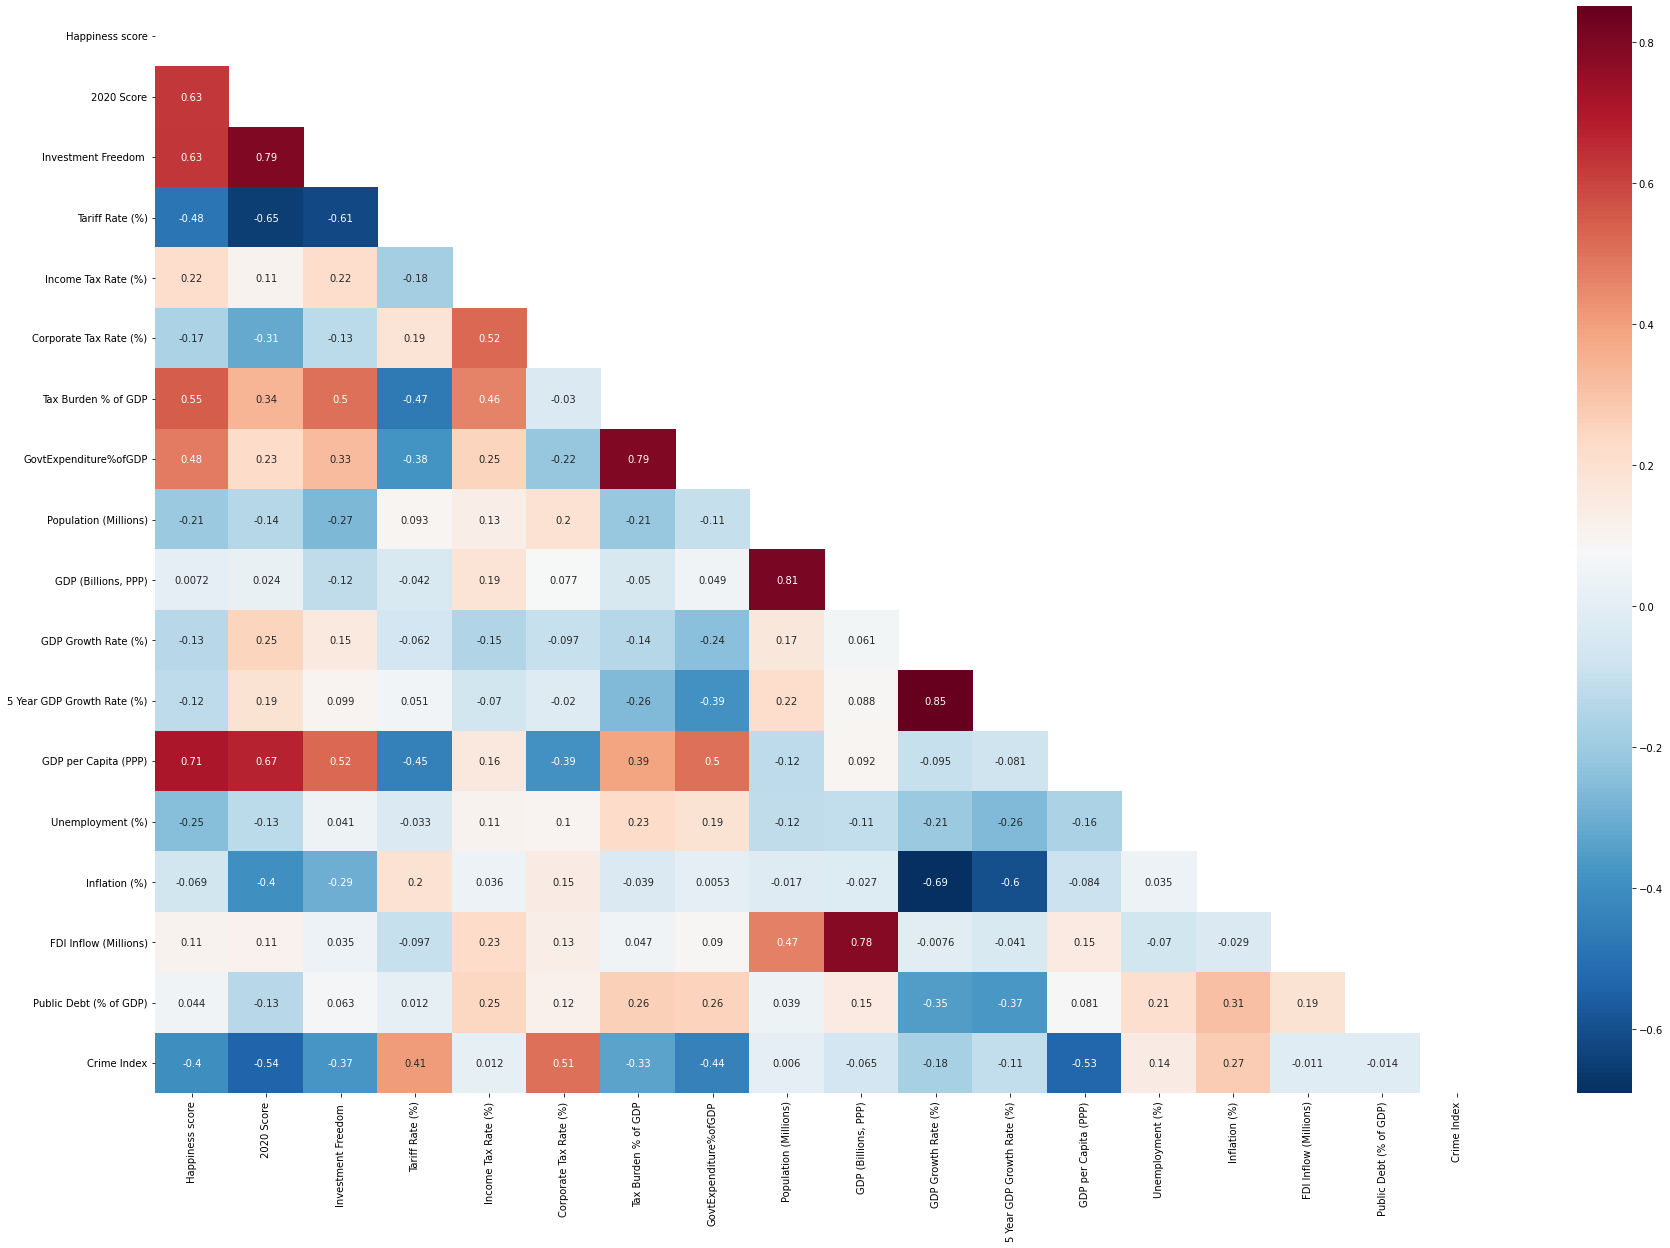





 2021


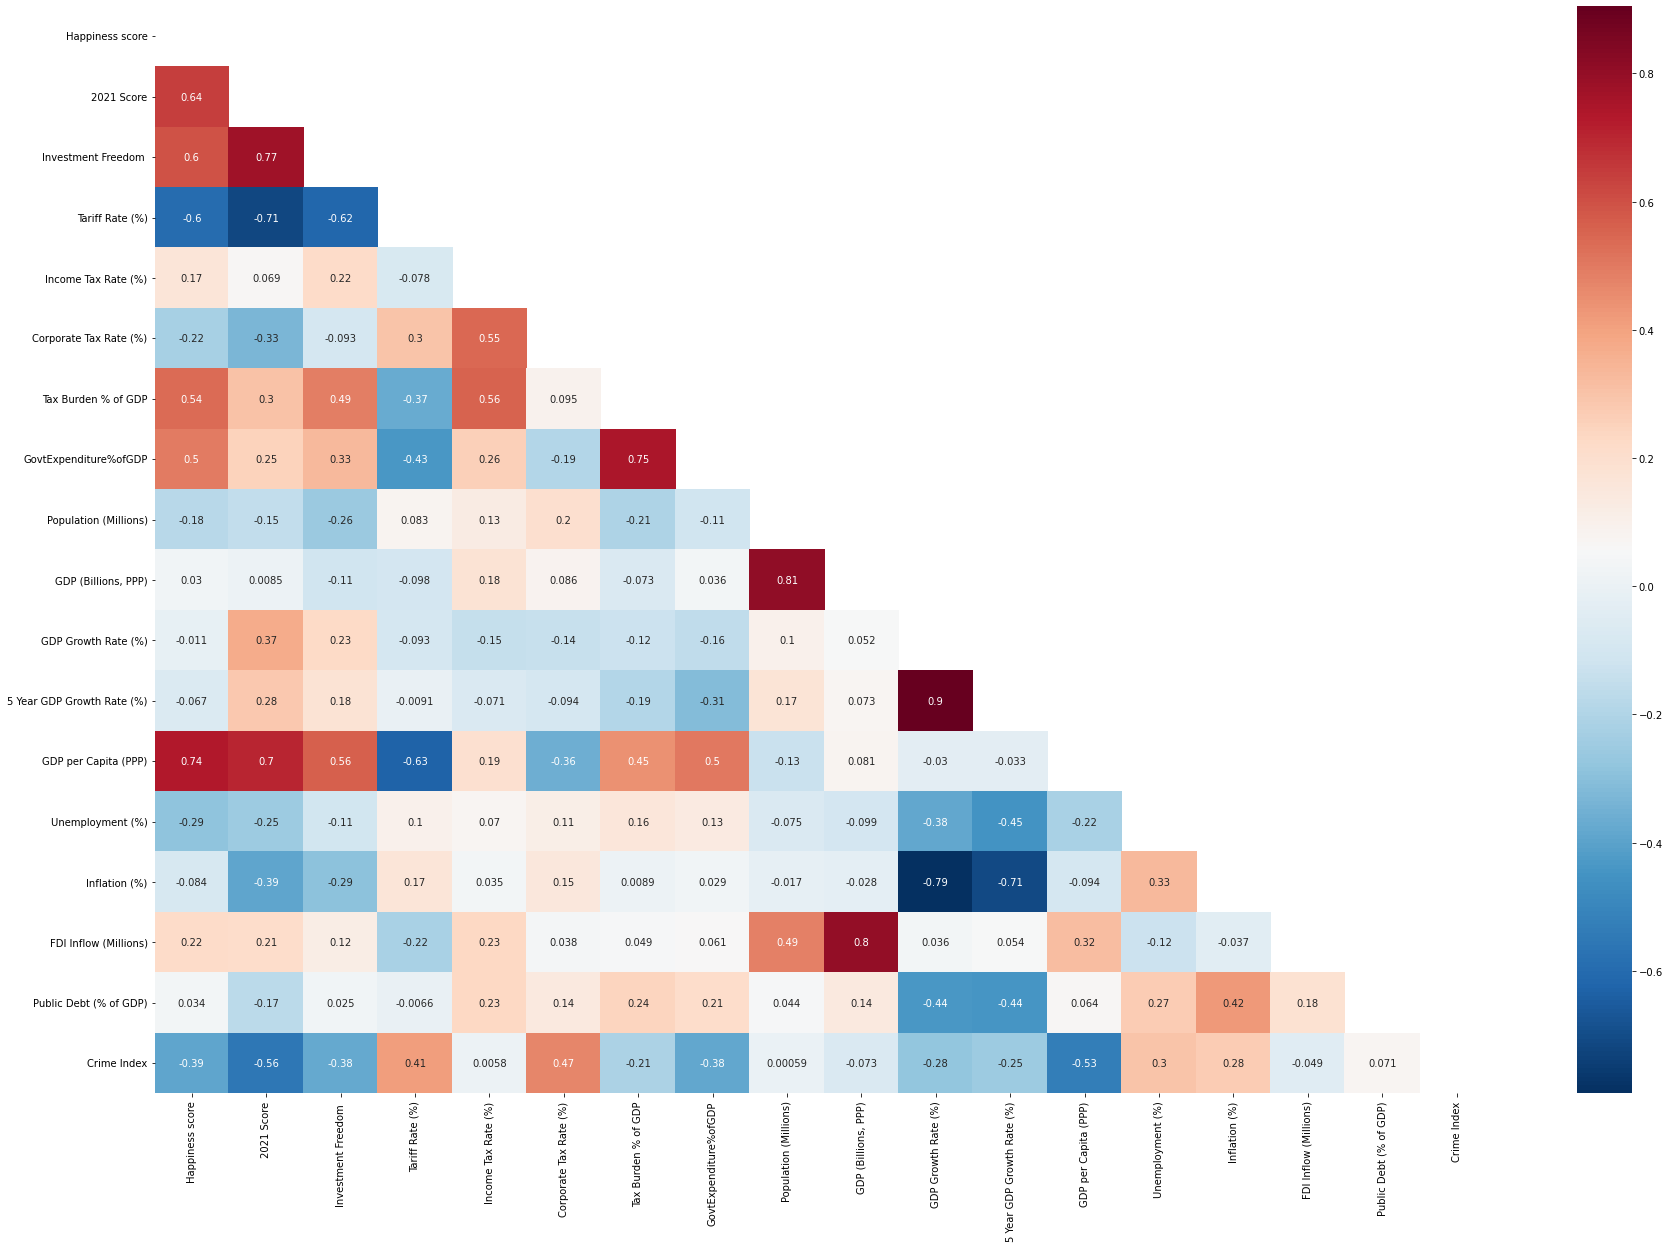





 2022


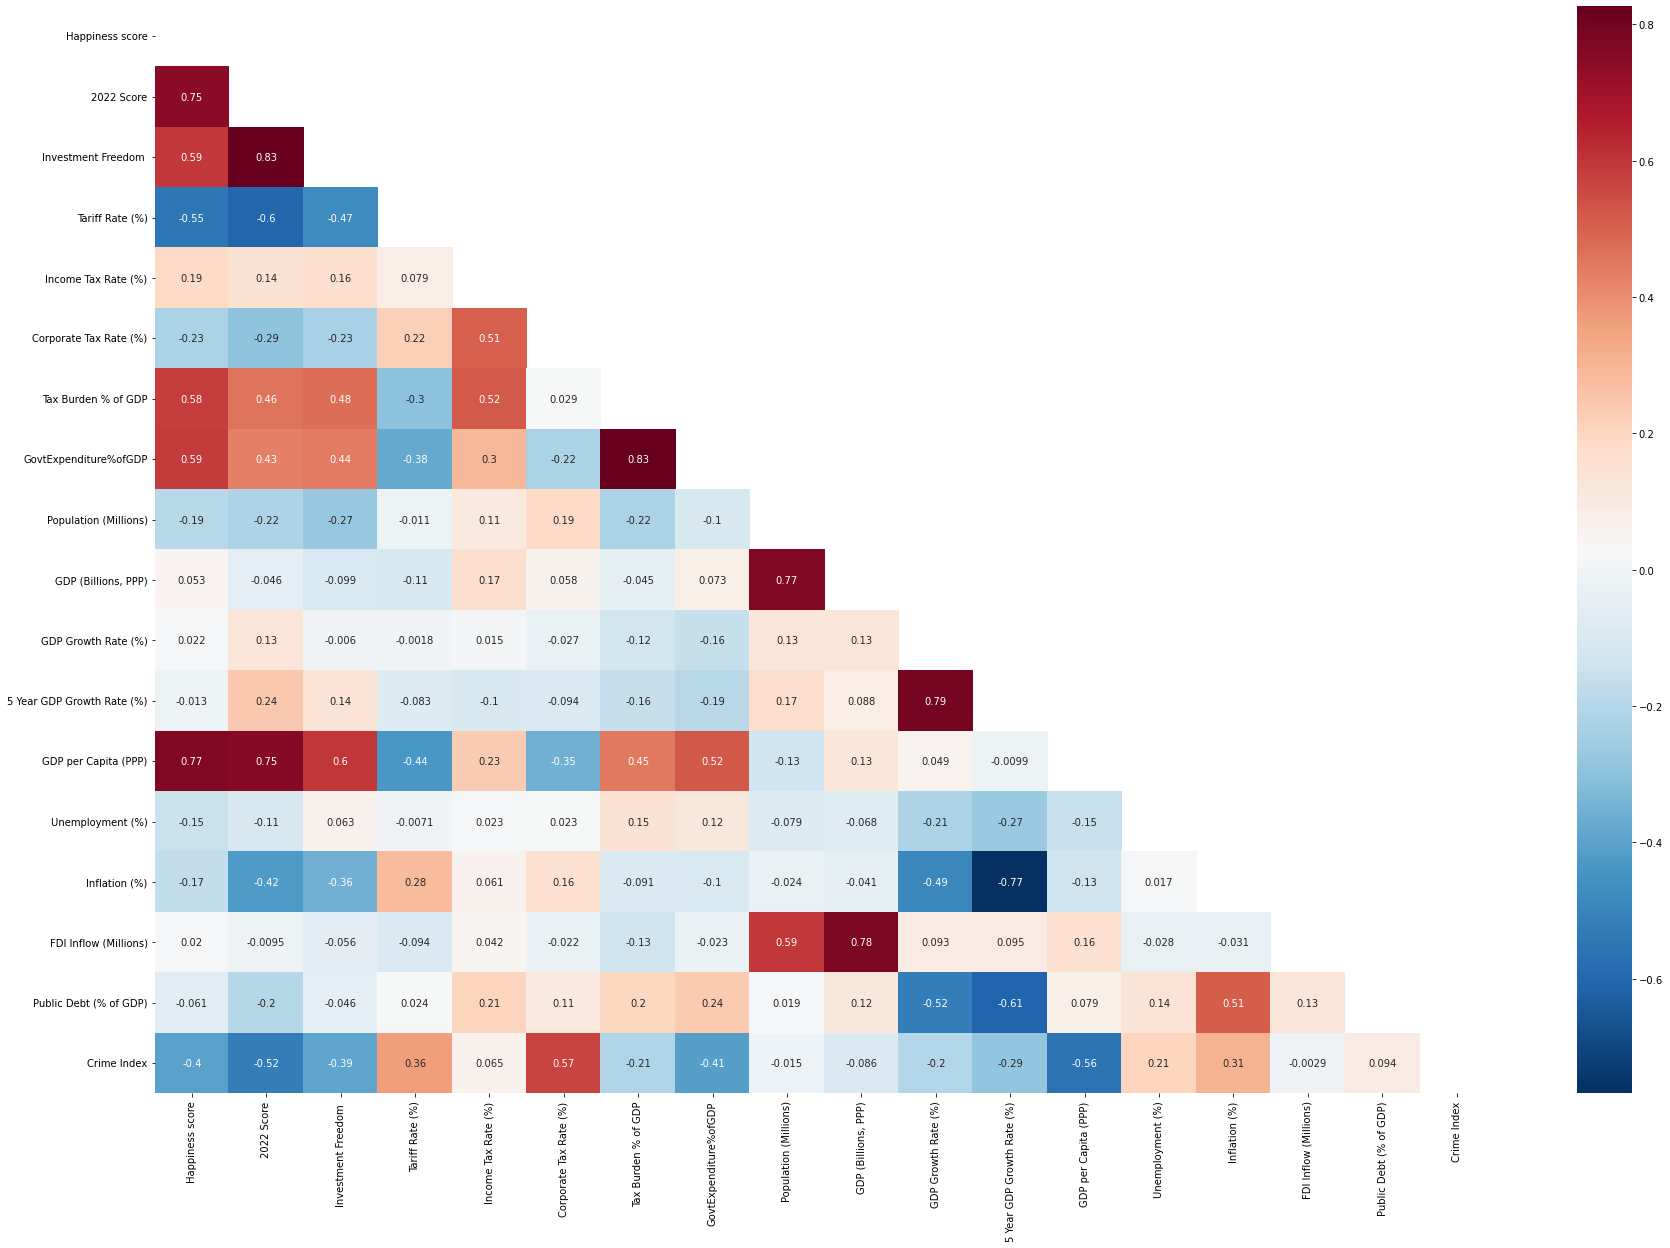

In [17]:
for year,CorrMergedData in ArrCorrMergedData.items():
    print('\n\n\n\n', year)
    plt.figure(figsize=(30,20))
    MatrizInf = np.triu(CorrMergedData)
    sns.heatmap(CorrMergedData, cmap='RdBu_r', annot=True, mask=MatrizInf)
    plt.show()

### Global

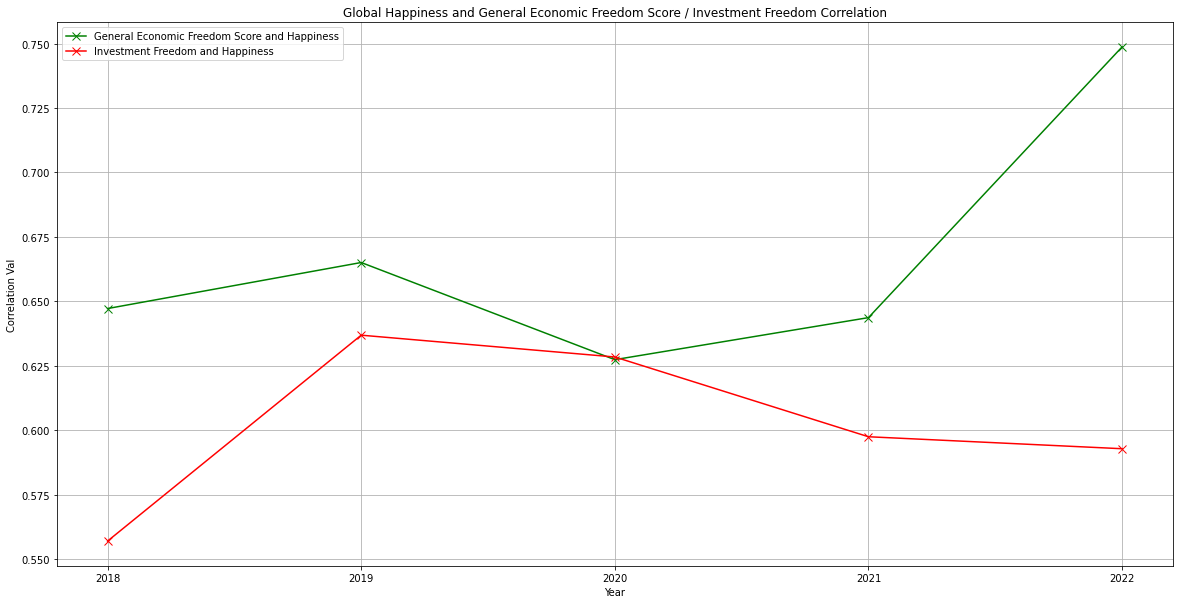

In [18]:
valHS = []
valHS.append(CorrEconFreedom2018.loc['2018 Score', 'Happiness score'])
valHS.append(CorrEconFreedom2019.loc['2019 Score', 'Happiness score'])
valHS.append(CorrEconFreedom2020.loc['2020 Score', 'Happiness score'])
valHS.append(CorrEconFreedom2021.loc['2021 Score', 'Happiness score'])
valHS.append(CorrEconFreedom2022.loc['2022 Score', 'Happiness score'])

valHIF = []
valHIF.append(CorrEconFreedom2018.loc['Investment Freedom ', 'Happiness score'])
valHIF.append(CorrEconFreedom2019.loc['Investment Freedom ', 'Happiness score'])
valHIF.append(CorrEconFreedom2020.loc['Investment Freedom ', 'Happiness score'])
valHIF.append(CorrEconFreedom2021.loc['Investment Freedom ', 'Happiness score'])
valHIF.append(CorrEconFreedom2022.loc['Investment Freedom ', 'Happiness score'])

valHC = []
valHC.append(CorrEconFreedom2018.loc['Crime Index', 'Happiness score'])
valHC.append(CorrEconFreedom2019.loc['Crime Index', 'Happiness score'])
valHC.append(CorrEconFreedom2020.loc['Crime Index', 'Happiness score'])
valHC.append(CorrEconFreedom2021.loc['Crime Index', 'Happiness score'])
valHC.append(CorrEconFreedom2022.loc['Crime Index', 'Happiness score'])

plt.figure(figsize=(20, 10))
plt.plot([2018,2019,2020,2021,2022],valHS, color='green', marker='x', markersize=8, label='General Economic Freedom Score and Happiness')
plt.plot([2018,2019,2020,2021,2022],valHIF, color='red', marker='x', markersize=8, label='Investment Freedom and Happiness')
plt.xticks([2018,2019,2020,2021,2022])
plt.xlabel('Year')
plt.ylabel('Correlation Val')
plt.title('Global Happiness and General Economic Freedom Score / Investment Freedom Correlation')
plt.grid(True)
plt.legend()
plt.show()

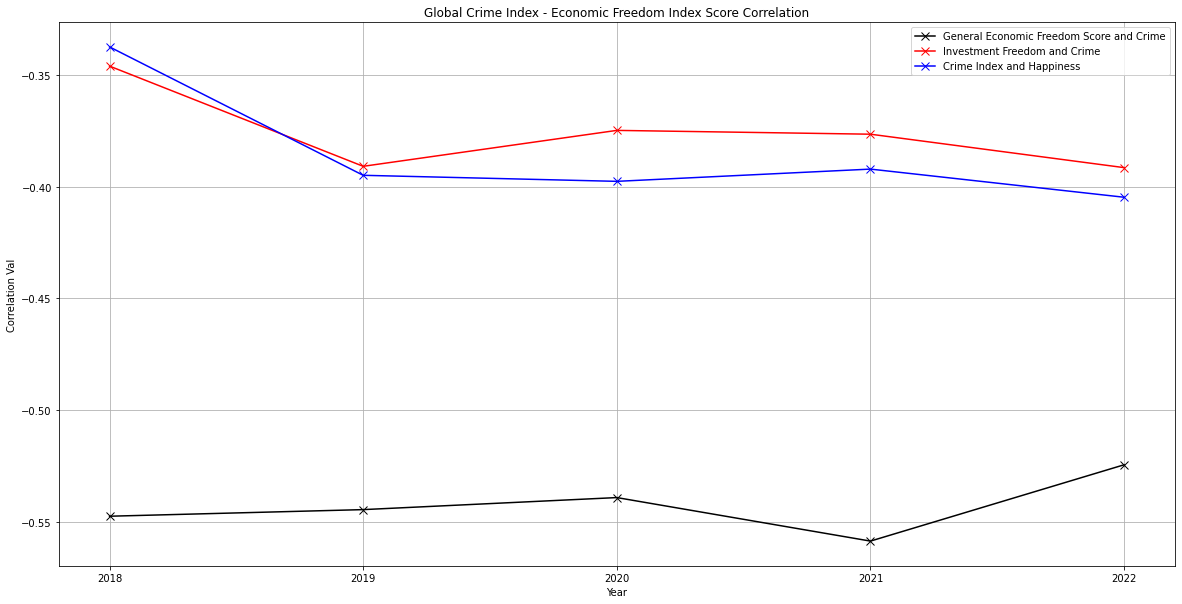

In [19]:
valCS = []
valCS.append(CorrEconFreedom2018.loc['2018 Score', 'Crime Index'])
valCS.append(CorrEconFreedom2019.loc['2019 Score', 'Crime Index'])
valCS.append(CorrEconFreedom2020.loc['2020 Score', 'Crime Index'])
valCS.append(CorrEconFreedom2021.loc['2021 Score', 'Crime Index'])
valCS.append(CorrEconFreedom2022.loc['2022 Score', 'Crime Index'])

valCIF = []
valCIF.append(CorrEconFreedom2018.loc['Investment Freedom ', 'Crime Index'])
valCIF.append(CorrEconFreedom2019.loc['Investment Freedom ', 'Crime Index'])
valCIF.append(CorrEconFreedom2020.loc['Investment Freedom ', 'Crime Index'])
valCIF.append(CorrEconFreedom2021.loc['Investment Freedom ', 'Crime Index'])
valCIF.append(CorrEconFreedom2022.loc['Investment Freedom ', 'Crime Index'])

plt.figure(figsize=(20, 10))
plt.plot([2018, 2019, 2020, 2021, 2022],valCS, color='black', marker='x', markersize=8, label='General Economic Freedom Score and Crime')
plt.plot([2018, 2019, 2020, 2021, 2022],valCIF, color='red', marker='x', markersize=8, label='Investment Freedom and Crime')
plt.plot([2018,2019,2020,2021,2022],valHC, color='blue', marker='x', markersize=8, label='Crime Index and Happiness')
plt.xticks([2018,2019,2020,2021,2022])
plt.xlabel('Year')
plt.ylabel('Correlation Val')
plt.title('Global Crime Index - Economic Freedom Index Score Correlation')
plt.grid(True)
plt.legend()
plt.show()

### Mexico

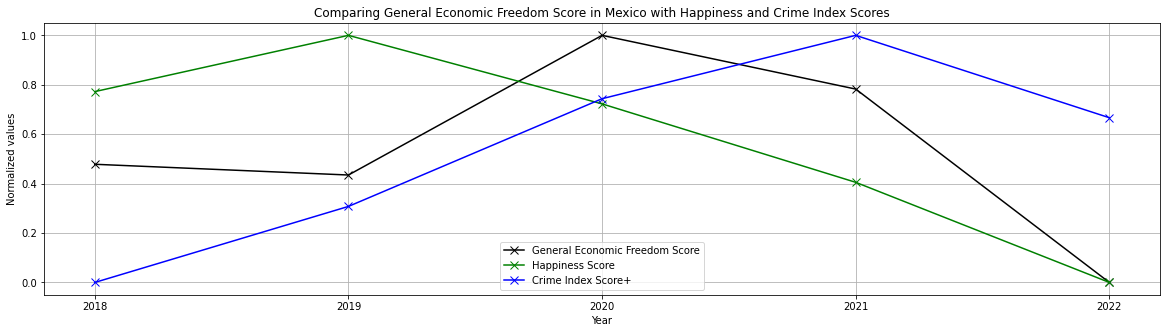

In [20]:
# valIMex = []
# valIMex.append(mergedData20182.loc[mergedData20182['Country']=="Mexico", 'Inflation (%)'].values[0])
# valIMex.append(mergedData20192.loc[mergedData20192['Country']=="Mexico", 'Inflation (%)'].values[0])
# valIMex.append(mergedData20202.loc[mergedData20202['Country']=="Mexico", 'Inflation (%)'].values[0])
# valIMex.append(mergedData20212.loc[mergedData20212['Country']=="Mexico", 'Inflation (%)'].values[0])
# valIMex.append(mergedData20222.loc[mergedData20222['Country']=="Mexico", 'Inflation (%)'].values[0])
# valIMexNorm = [(float(i)-min(valIMex))/(max(valIMex)-min(valIMex)) for i in valIMex]

valSMex = []
valSMex.append(mergedData20182.loc[mergedData20182['Country']=="Mexico", '2018 Score'].values[0])
valSMex.append(mergedData20192.loc[mergedData20192['Country']=="Mexico", '2019 Score'].values[0])
valSMex.append(mergedData20202.loc[mergedData20202['Country']=="Mexico", '2020 Score'].values[0])
valSMex.append(mergedData20212.loc[mergedData20212['Country']=="Mexico", '2021 Score'].values[0])
valSMex.append(mergedData20222.loc[mergedData20222['Country']=="Mexico", '2022 Score'].values[0])
valSMexNorm = [(float(i)-min(valSMex))/(max(valSMex)-min(valSMex)) for i in valSMex]

valHMex = []
valHMex.append(mergedData20182.loc[mergedData20182['Country']=="Mexico", 'Happiness score'].values[0])
valHMex.append(mergedData20192.loc[mergedData20192['Country']=="Mexico", 'Happiness score'].values[0])
valHMex.append(mergedData20202.loc[mergedData20202['Country']=="Mexico", 'Happiness score'].values[0])
valHMex.append(mergedData20212.loc[mergedData20212['Country']=="Mexico", 'Happiness score'].values[0])
valHMex.append(mergedData20222.loc[mergedData20222['Country']=="Mexico", 'Happiness score'].values[0])
valHMexNorm = [(float(i)-min(valHMex))/(max(valHMex)-min(valHMex)) for i in valHMex]

valCMex = []
valCMex.append(mergedData20182.loc[mergedData20182['Country']=="Mexico", 'Crime Index'].values[0])
valCMex.append(mergedData20192.loc[mergedData20192['Country']=="Mexico", 'Crime Index'].values[0])
valCMex.append(mergedData20202.loc[mergedData20202['Country']=="Mexico", 'Crime Index'].values[0])
valCMex.append(mergedData20212.loc[mergedData20212['Country']=="Mexico", 'Crime Index'].values[0])
valCMex.append(mergedData20222.loc[mergedData20222['Country']=="Mexico", 'Crime Index'].values[0])
valCMexNorm = [(float(i)-min(valCMex))/(max(valCMex)-min(valCMex)) for i in valCMex]

plt.figure(figsize=(20, 5))
plt.plot([2018, 2019, 2020, 2021, 2022],valSMexNorm, color='black', marker='x', markersize=8, label='General Economic Freedom Score')
plt.plot([2018, 2019, 2020, 2021, 2022],valHMexNorm, color='green', marker='x', markersize=8,label='Happiness Score')
plt.plot([2018, 2019, 2020, 2021, 2022],valCMexNorm, color='blue', marker='x',  markersize=8,label='Crime Index Score+')
plt.xticks([2018,2019,2020,2021,2022])
plt.xlabel('Year')
plt.ylabel('Normalized values')
plt.title('Comparing General Economic Freedom Score in Mexico with Happiness and Crime Index Scores')
plt.grid(True)
plt.legend()
plt.show()


### Combine Dataframes one below the other to have more data available for model

In [21]:
concatenatedDF = pd.concat([mergedData20182, mergedData20192, mergedData20202, mergedData20212, mergedData20222],ignore_index=True)
concatenatedDF

,Country,Happiness score,2018 Score,Investment Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,GovtExpenditure%ofGDP,Population (Millions),...,GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Crime Index,2019 Score,2020 Score,2021 Score,2022 Score
0,Finland,7.6321,74.1,85.0,1.57,31.8,20.0,43.988,57.054346,5.487,...,42164.6,8.997,0.389,42.0338,63.558,23.7,NaN,NaN,NaN,NaN
1,Norway,7.5937,74.3,75.0,1.04,47.8,25.0,38.065,48.574474,5.263,...,69249.5,4.806,3.550,-5532.74,33.203,43.3,NaN,NaN,NaN,NaN
2,Denmark,7.5553,76.6,90.0,1.57,56.0,23.5,46.622,54.591838,5.707,...,47985.4,6.051,0.250,950.723,39.872,22.0,NaN,NaN,NaN,NaN
3,Iceland,7.4952,77.0,85.0,0.77,31.8,20.0,37.116,43.127483,0.336,...,49135.6,3.76,1.697,-484.414,53.230,24.5,NaN,NaN,NaN,NaN
4,Switzerland,7.4873,81.7,85.0,0.00,40.0,24.0,27.891,33.969483,8.327,...,59560.7,4.583,-0.432,-26340.2,45.388,21.8,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,India,3.7771,NaN,40.0,7.00,30.9,32.4,6.810,28.156333,1380,...,6461.01,7.11,6.195,64062,89.559,44.6,NaN,NaN,NaN,53.9
518,Zambia,3.7598,NaN,55.0,8.40,37.5,35.0,16.700,29.817333,18.384,...,3341.99,12.17,16.350,234,117.761,46.3,NaN,NaN,NaN,48.7
519,Tanzania,3.7024,NaN,55.0,10.10,30.0,30.0,11.700,16.470000,59.7342,...,2820.6,2.16,3.000,1013,38.182,56.3,NaN,NaN,NaN,59.5
520,Zimbabwe,2.9951,NaN,25.0,67.70,51.5,24.0,12.600,20.684000,14.8629,...,2621.82,5.7,557.210,194,88.873,59.7,NaN,NaN,NaN,33.1


In [106]:
concatenatedDF['2018 Score'] = concatenatedDF['2018 Score'].astype(str)
concatenatedDF['2019 Score'] = concatenatedDF['2019 Score'].astype(str)
concatenatedDF['2020 Score'] = concatenatedDF['2020 Score'].astype(str)
concatenatedDF['2021 Score'] = concatenatedDF['2021 Score'].astype(str)
concatenatedDF['2022 Score'] = concatenatedDF['2022 Score'].astype(str)

concatenatedDF["Score20182022"] = concatenatedDF[["2018 Score", "2019 Score","2020 Score", "2021 Score", "2022 Score"]].apply(lambda x: "".join(x), axis =1)
concatenatedDF['Score20182022'] = concatenatedDF['Score20182022'].replace('[a-z]','',regex=True)

# with pd.ExcelWriter('nuevo.xlsx') as writer:
#      concatenatedDF.to_excel(writer)


concatenatedDF

,Country,Happiness score,2018 Score,Investment Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,GovtExpenditure%ofGDP,Population (Millions),...,Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Crime Index,2019 Score,2020 Score,2021 Score,2022 Score,Score20182022
0,Finland,7.6321,74.1,85.0,1.57,31.8,20.0,43.988,57.054346,5.487,...,8.997,0.389,42.0338,63.558,23.7,nan,nan,nan,nan,74.1
1,Norway,7.5937,74.3,75.0,1.04,47.8,25.0,38.065,48.574474,5.263,...,4.806,3.550,-5532.74,33.203,43.3,nan,nan,nan,nan,74.3
2,Denmark,7.5553,76.6,90.0,1.57,56.0,23.5,46.622,54.591838,5.707,...,6.051,0.250,950.723,39.872,22.0,nan,nan,nan,nan,76.6
3,Iceland,7.4952,77.0,85.0,0.77,31.8,20.0,37.116,43.127483,0.336,...,3.76,1.697,-484.414,53.230,24.5,nan,nan,nan,nan,77.0
4,Switzerland,7.4873,81.7,85.0,0.00,40.0,24.0,27.891,33.969483,8.327,...,4.583,-0.432,-26340.2,45.388,21.8,nan,nan,nan,nan,81.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,India,3.7771,nan,40.0,7.00,30.9,32.4,6.810,28.156333,1380,...,7.11,6.195,64062,89.559,44.6,nan,nan,nan,53.9,53.9
518,Zambia,3.7598,nan,55.0,8.40,37.5,35.0,16.700,29.817333,18.384,...,12.17,16.350,234,117.761,46.3,nan,nan,nan,48.7,48.7
519,Tanzania,3.7024,nan,55.0,10.10,30.0,30.0,11.700,16.470000,59.7342,...,2.16,3.000,1013,38.182,56.3,nan,nan,nan,59.5,59.5
520,Zimbabwe,2.9951,nan,25.0,67.70,51.5,24.0,12.600,20.684000,14.8629,...,5.7,557.210,194,88.873,59.7,nan,nan,nan,33.1,33.1


# Random Forest Regression - Happiness

In [213]:
#concatenatedDF = concatenatedDF.drop(columns=["GDP per Capita (PPP)","Tax Burden % of GDP","GovtExpenditure%ofGDP","GovtExpenditure%ofGDP","GDP Growth Rate (%)","5 Year GDP Growth Rate (%)","Country", '2018 Score','2019 Score','2020 Score','2021 Score','2022 Score'])
#concatenatedDFC = concatenatedDF.drop(columns=["Happiness score","Country", '2018 Score','2019 Score','2020 Score','2021 Score','2022 Score'])

concatenatedDFC = concatenatedDF.drop(columns=["Happiness score","Country", '2018 Score','2019 Score','2020 Score','2021 Score','2022 Score'])
concatenatedDFH = concatenatedDF.drop(columns=["Crime Index","5 Year GDP Growth Rate (%)","GDP per Capita (PPP)","Country", '2018 Score','2019 Score','2020 Score','2021 Score','2022 Score'])
concatenatedDFH = concatenatedDFH.dropna()
concatenatedDFC = concatenatedDFC.dropna()
concatenatedDFH



,Happiness score,Investment Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,GovtExpenditure%ofGDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Score20182022
0,7.6321,85.0,1.57,31.8,20.0,43.988,57.054346,5.487,231.37,0.4,8.997,0.389,42.0338,63.558,74.1
1,7.5937,75.0,1.04,47.8,25.0,38.065,48.574474,5.263,364.439,1.6,4.806,3.550,-5532.74,33.203,74.3
2,7.5553,90.0,1.57,56.0,23.5,46.622,54.591838,5.707,273.865,1.2,6.051,0.250,950.723,39.872,76.6
3,7.4952,85.0,0.77,31.8,20.0,37.116,43.127483,0.336,16.519,4,3.76,1.697,-484.414,53.230,77.0
4,7.4873,85.0,0.00,40.0,24.0,27.891,33.969483,8.327,495.962,0.9,4.583,-0.432,-26340.2,45.388,81.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,3.7771,40.0,7.00,30.9,32.4,6.810,28.156333,1380,8907.12,-7.965,7.11,6.195,64062,89.559,53.9
518,3.7598,55.0,8.40,37.5,35.0,16.700,29.817333,18.384,63.103,-3.497,12.17,16.350,234,117.761,48.7
519,3.7024,55.0,10.10,30.0,30.0,11.700,16.470000,59.7342,163.598,1.029,2.16,3.000,1013,38.182,59.5
520,2.9951,25.0,67.70,51.5,24.0,12.600,20.684000,14.8629,39.824,-8.002,5.7,557.210,194,88.873,33.1


In [214]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import model_selection

In [215]:
X = np.array(concatenatedDFH[concatenatedDFH.columns.difference(['Happiness score'])])
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,20,42.0338,231.37,0.4,57.0543,31.8,0.389,85,5.487,63.558,74.1,1.57,43.988,8.997
1,25,-5532.74,364.439,1.6,48.5745,47.8,3.55,75,5.263,33.203,74.3,1.04,38.065,4.806
2,23.5,950.723,273.865,1.2,54.5918,56,0.25,90,5.707,39.872,76.6,1.57,46.622,6.051
3,20,-484.414,16.519,4,43.1275,31.8,1.697,85,0.336,53.23,77.0,0.77,37.116,3.76
4,24,-26340.2,495.962,0.9,33.9695,40,-0.432,85,8.327,45.388,81.7,0,27.891,4.583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,32.4,64062,8907.12,-7.965,28.1563,30.9,6.195,40,1380,89.559,53.9,7,6.81,7.11
518,35,234,63.103,-3.497,29.8173,37.5,16.35,55,18.384,117.761,48.7,8.4,16.7,12.17
519,30,1013,163.598,1.029,16.47,30,3,55,59.7342,38.182,59.5,10.1,11.7,2.16
520,24,194,39.824,-8.002,20.684,51.5,557.21,25,14.8629,88.873,33.1,67.7,12.6,5.7


In [216]:
Y = np.array(concatenatedDFH[['Happiness score']])
pd.DataFrame(Y)

,0
0,7.6321
1,7.5937
2,7.5553
3,7.4952
4,7.4873
...,...
517,3.7771
518,3.7598
519,3.7024
520,2.9951


In [217]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, 
                                                                    test_size = 0.15, 
                                                                    random_state = 1234, 
                                                                    shuffle = True)

In [218]:
pd.DataFrame(X_train)
#pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,27,3570,172.4,4.57,17.9,25,3.3,70,10.2,37.7,61.0,4.6,13.6,5.5
1,25,3255,133.7,8.4,24.5,35,12.4,70,28.3,71.8,57.5,10.8,16.5,2.4
2,30,823,106.106,-2.104,18.4827,40,3.792,55,45.741,45.744,54.2,13.6,11.8,2.44
3,19,529,81.334,-5.532,46.0383,50,-0.051,70,2.10013,81.452,70.5,2.9,37.65,5.17
4,15.8,25706.2,4356.35,1.452,43.8861,47.5,1.927,80,82.886,59.754,73.5,1.8,37.5,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,25,2989,190.677,5.643,19.956,35,9.837,70,29.555,59.56,59.4,10.6,17.6,6.7
439,24,4631.22,323.653,1.87,46.838,44,0.517,55,10.7163,179.2,60.9,3,38.74,17.2
440,20,1225.23,256.456,2.429,54.4155,31.25,1.169,85,5.524,60.517,75.7,1.8,43.3,7.8
441,12.5,4137.76,29.666,1.6,39.6317,35,-1.218,75,0.848,107.96,67.8,1.57,33.2,11.728


In [219]:
pd.DataFrame(Y_train)
#pd.DataFrame(Y_test)

,0
0,5.4253
1,4.9963
2,4.6026
3,6.6301
4,7.0758
...,...
438,5.1480
439,5.7226
440,7.8087
441,5.7625


In [220]:
PronosticoBA = RandomForestRegressor(n_estimators=5000, max_depth=12, min_samples_split=6, min_samples_leaf=2,random_state=0)
PronosticoBA.fit(X_train, Y_train)

c:\users\andre\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(max_depth=12, min_samples_leaf=2, min_samples_split=6,
                      n_estimators=5000, random_state=0)

In [221]:
Y_Pronostico = PronosticoBA.predict(X_test)
pd.DataFrame(Y_Pronostico)

,0
0,6.115432
1,5.473832
2,6.586427
3,5.529145
4,7.199964
...,...
74,7.393918
75,6.290743
76,6.019809
77,5.868170


In [222]:
Valores = pd.DataFrame(Y_test, Y_Pronostico)
Valores

,0
6.115432,5.8935
5.473832,5.5285
6.586427,6.6266
5.529145,5.6030
7.199964,7.0341
...,...
7.393918,7.5045
6.290743,6.1719
6.019809,6.0834
5.868170,6.2998


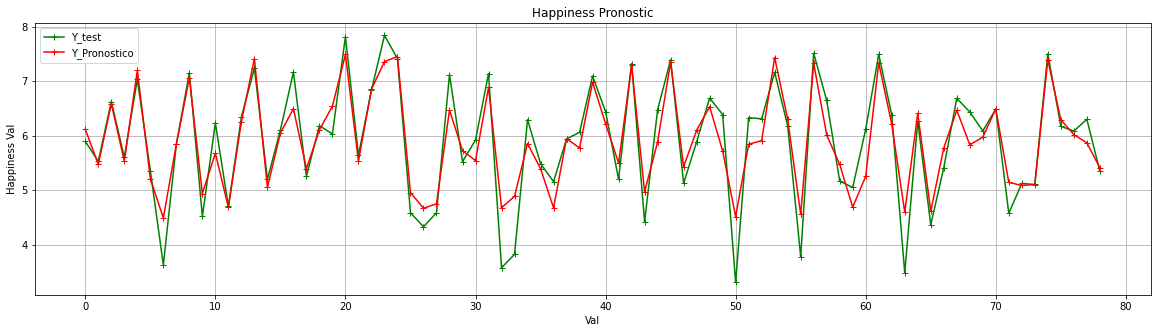

In [223]:
plt.figure(figsize=(20, 5))
plt.plot(Y_test, color='green', marker='+', label='Y_test')
plt.plot(Y_Pronostico, color='red', marker='+', label='Y_Pronostico')
plt.xlabel('Val')
plt.ylabel('Happiness Val')
plt.title('Happiness Pronostic')
plt.grid(True)
plt.legend()
plt.show()

In [224]:
r2_score(Y_test, Y_Pronostico)

0.850034170283318

In [225]:
print('Criterio: ', PronosticoBA.criterion)
print("MAE: %.4f" % mean_absolute_error(Y_test, Y_Pronostico))
print("MSE: %.4f" % mean_squared_error(Y_test, Y_Pronostico))
print("RMSE: %.4f" % mean_squared_error(Y_test, Y_Pronostico, squared=False))   #True devuelve MSE, False devuelve RMSE
print('Score: %.4f' % r2_score(Y_test, Y_Pronostico))

Criterio:  squared_error
MAE: 0.3124
MSE: 0.1797
RMSE: 0.4239
Score: 0.8500


In [226]:
HappinessValue = pd.DataFrame({'Investment Freedom': [99],
                               'Tariff Rate (%)': [3.2],
                             'Income Tax Rate (%)': [12],
                               'Corporate Tax Rate (%)':[30],
                               'Tax Burden % of GDP':[16.5],
                               'GovtExpenditure%ofGDP':[26.9],
                               'Population (Millions)':[128.9],
                             'GDP (Billions, PPP)': [2444.7], 
                               'GDP Growth Rate (%)':[8.2],
                             #'5 Year GDP Growth Rate (%)': [0.3], 
                               #'GDP per Capita (PPP)':[19130],
                                  'Unemployment (%) ':[4.7]
                                 , 'Inflation (%)':[15]
                                 , 'FDI Inflow (Millions)':[29000]
                                 , 'Public Debt (% of GDP)':[60.6]
                                 , 'Score20182022':[63.7]
                                 })
PronosticoBA.predict(HappinessValue)

c:\users\andre\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([3.98695324])

# Random Forest Regression - Crime Index

In [227]:
X = np.array(concatenatedDFC[concatenatedDFC.columns.difference(['Crime Index'])])
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.2322,20,42.0338,231.37,0.4,42164.6,57.0543,31.8,0.389,85,5.487,63.558,74.1,1.57,43.988,8.997
1,1.6604,25,-5532.74,364.439,1.6,69249.5,48.5745,47.8,3.55,75,5.263,33.203,74.3,1.04,38.065,4.806
2,1.1162,23.5,950.723,273.865,1.2,47985.4,54.5918,56,0.25,90,5.707,39.872,76.6,1.57,46.622,6.051
3,3.7702,20,-484.414,16.519,4,49135.6,43.1275,31.8,1.697,85,0.336,53.23,77.0,0.77,37.116,3.76
4,1.3922,24,-26340.2,495.962,0.9,59560.7,33.9695,40,-0.432,85,8.327,45.388,81.7,0,27.891,4.583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,3.5322,32.4,64062,8907.12,-7.965,6461.01,28.1563,30.9,6.195,40,1380,89.559,53.9,7,6.81,7.11
518,1.852,35,234,63.103,-3.497,3341.99,29.8173,37.5,16.35,55,18.384,117.761,48.7,8.4,16.7,12.17
519,5.7198,30,1013,163.598,1.029,2820.6,16.47,30,3,55,59.7342,38.182,59.5,10.1,11.7,2.16
520,-1.293,24,194,39.824,-8.002,2621.82,20.684,51.5,557.21,25,14.8629,88.873,33.1,67.7,12.6,5.7


In [228]:
Y = np.array(concatenatedDFC[['Crime Index']])
pd.DataFrame(Y)

,0
0,23.7
1,43.3
2,22.0
3,24.5
4,21.8
...,...
517,44.6
518,46.3
519,56.3
520,59.7


In [229]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, 
                                                                    test_size = 0.15, 
                                                                    random_state = 1234, 
                                                                    shuffle = True)

In [230]:
pd.DataFrame(X_train)
#pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,6.1,27,3570,172.4,4.57,16944.2,17.9,25,3.3,70,10.2,37.7,61.0,4.6,13.6,5.5
1,5.5,25,3255,133.7,8.4,4729.49,24.5,35,12.4,70,28.3,71.8,57.5,10.8,16.5,2.4
2,3.904,30,823,106.106,-2.104,2574,18.4827,40,3.792,55,45.741,45.744,54.2,13.6,11.8,2.44
3,2.0044,19,529,81.334,-5.532,38807,46.0383,50,-0.051,70,2.10013,81.452,70.5,2.9,37.65,5.17
4,1.9,15.8,25706.2,4356.35,1.452,52558.7,43.8861,47.5,1.927,80,82.886,59.754,73.5,1.8,37.5,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,4.5,25,2989,190.677,5.643,6451.72,19.956,35,9.837,70,29.555,59.56,59.4,10.6,17.6,6.7
439,0.936,24,4631.22,323.653,1.87,31399.4,46.838,44,0.517,55,10.7163,179.2,60.9,3,38.74,17.2
440,1.4,20,1225.23,256.456,2.429,46429.5,54.4155,31.25,1.169,85,5.524,60.517,75.7,1.8,43.3,7.8
441,-1.2252,12.5,4137.76,29.666,1.6,34970.3,39.6317,35,-1.218,75,0.848,107.96,67.8,1.57,33.2,11.728


In [231]:
pd.DataFrame(Y_train)
#pd.DataFrame(Y_test)

,0
0,61.4
1,51.9
2,56.2
3,22.7
4,34.8
...,...
438,49.0
439,44.1
440,23.3
441,30.2


In [232]:
PronosticoBA = RandomForestRegressor(n_estimators=5000, max_depth=12, min_samples_split=6, min_samples_leaf=2,random_state=0)
PronosticoBA.fit(X_train, Y_train)

c:\users\andre\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(max_depth=12, min_samples_leaf=2, min_samples_split=6,
                      n_estimators=5000, random_state=0)

In [233]:
Y_Pronostico = PronosticoBA.predict(X_test)
pd.DataFrame(Y_Pronostico)

,0
0,29.099761
1,40.733678
2,37.792041
3,38.291067
4,39.140205
...,...
74,25.853378
75,50.610729
76,30.679590
77,65.439965


In [234]:
Valores = pd.DataFrame(Y_test, Y_Pronostico)
Valores

,0
29.099761,20.8
40.733678,45.4
37.792041,31.9
38.291067,37.3
39.140205,36.4
...,...
25.853378,23.4
50.610729,52.1
30.679590,37.0
65.439965,70.2


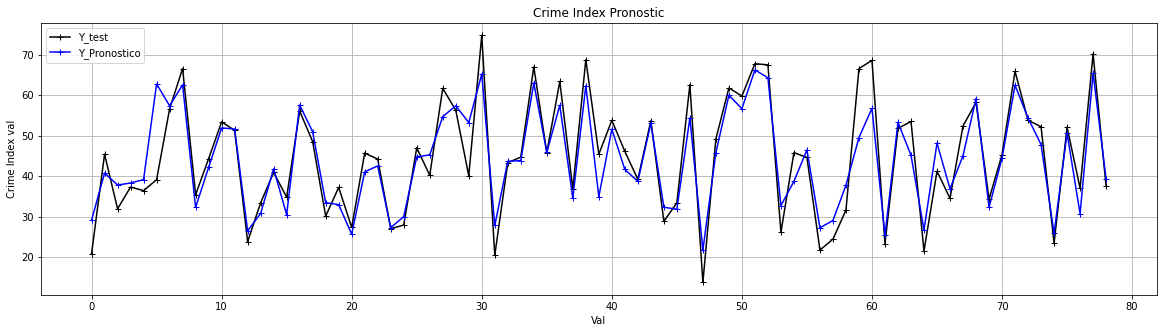

In [235]:
plt.figure(figsize=(20, 5))
plt.plot(Y_test, color='black', marker='+', label='Y_test')
plt.plot(Y_Pronostico, color='blue', marker='+', label='Y_Pronostico')
plt.xlabel('Val')
plt.ylabel('Crime Index val')
plt.title('Crime Index Pronostic')
plt.grid(True)
plt.legend()
plt.show()

In [236]:
r2_score(Y_test, Y_Pronostico)

0.8439105813452208

In [237]:
print('Criterio: \n', PronosticoBA.criterion)
print("MAE: %.4f" % mean_absolute_error(Y_test, Y_Pronostico))
print("MSE: %.4f" % mean_squared_error(Y_test, Y_Pronostico))
print("RMSE: %.4f" % mean_squared_error(Y_test, Y_Pronostico, squared=False))   #True devuelve MSE, False devuelve RMSE
print('Score: %.4f' % r2_score(Y_test, Y_Pronostico))

Criterio: 
 squared_error
MAE: 4.2044
MSE: 32.7585
RMSE: 5.7235
Score: 0.8439


# Linear Regression Model

In [238]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import model_selection

## Linear Regression Model - Happiness Pronostic

In [239]:
X = np.array(concatenatedDFH[concatenatedDFH.columns.difference(['Happiness score'])])
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,20,42.0338,231.37,0.4,57.0543,31.8,0.389,85,5.487,63.558,74.1,1.57,43.988,8.997
1,25,-5532.74,364.439,1.6,48.5745,47.8,3.55,75,5.263,33.203,74.3,1.04,38.065,4.806
2,23.5,950.723,273.865,1.2,54.5918,56,0.25,90,5.707,39.872,76.6,1.57,46.622,6.051
3,20,-484.414,16.519,4,43.1275,31.8,1.697,85,0.336,53.23,77.0,0.77,37.116,3.76
4,24,-26340.2,495.962,0.9,33.9695,40,-0.432,85,8.327,45.388,81.7,0,27.891,4.583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,32.4,64062,8907.12,-7.965,28.1563,30.9,6.195,40,1380,89.559,53.9,7,6.81,7.11
518,35,234,63.103,-3.497,29.8173,37.5,16.35,55,18.384,117.761,48.7,8.4,16.7,12.17
519,30,1013,163.598,1.029,16.47,30,3,55,59.7342,38.182,59.5,10.1,11.7,2.16
520,24,194,39.824,-8.002,20.684,51.5,557.21,25,14.8629,88.873,33.1,67.7,12.6,5.7


In [240]:
Y = np.array(concatenatedDFH[['Happiness score']])
pd.DataFrame(Y)

,0
0,7.6321
1,7.5937
2,7.5553
3,7.4952
4,7.4873
...,...
517,3.7771
518,3.7598
519,3.7024
520,2.9951


In [241]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, 
                                                                    test_size = 0.30, 
                                                                    random_state = 0, 
                                                                    shuffle = True)

In [242]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,32.4,50553,11043.2,4.228,26.7487,30.9,4.536,40,1366.42,71.9,56.5,10.3,11.1799,5.4
1,27,2554,194.555,-6.731,18.345,25,3.783,70,10.8479,69.405,63.0,8,13.5,8.9
2,20,1538.87,85.649,2.5,31.957,14,-0.778,70,6.976,94.991,64.9,3.98,13,13.241
3,31,1146.7,137.8,2.8,12.1,31,4.4,70,16.9,24.4,62.6,1.4,12.6,2.7
4,20,3877,501.296,-2.598,21.206,10,6.799,50,18.7544,27.363,64.4,4.8,15.07,6.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,28,1610.54,290.561,3.02,19.2297,24,4.27,40,21.688,84.065,57.4,8.7,12.6,4.4
153,10,365.236,34.694,3.551,31.1153,10,0.766,65,2.08346,48.9,68.6,6.3,17.6504,17.8
154,20,9069.31,451.282,1.2,22.168,10,14.552,50,17.947,21.08,69.1,4.72,15.6,5.228
155,15,2563.92,85.164,1,26.9457,20,-0.816,65,4.597,143.424,53.2,2.77,13.5,6.784


In [243]:
RLMultiple = linear_model.LinearRegression()
RLMultiple.fit(X_train, Y_train) 

LinearRegression()

In [244]:
#Se genera el pronóstico
Y_Pronostico = RLMultiple.predict(X_test)
pd.DataFrame(Y_Pronostico)

,0
0,4.723516
1,5.388317
2,5.078874
3,5.309237
4,5.483822
...,...
152,4.826623
153,5.052144
154,5.655686
155,4.683705


In [245]:
r2_score(Y_test, Y_Pronostico)

0.616222760472652

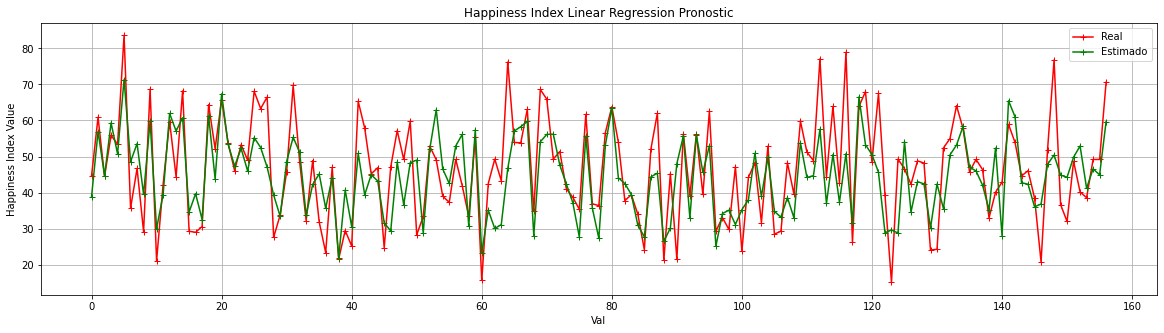

In [257]:
plt.figure(figsize=(20, 5))
plt.plot(Y_test, color='red', marker='+', label='Real')
plt.plot(Y_Pronostico, color='green', marker='+', label='Estimado')
plt.xlabel('Val')
plt.ylabel('Happiness Index Value')
plt.title('Happiness Index Linear Regression Pronostic')
plt.grid(True)
plt.legend()
plt.show()

### Data does not behave on a linear fashion

## Linear Regression Model - Crime Index Pronostic

In [247]:
X = np.array(concatenatedDFC[concatenatedDFC.columns.difference(['Crime Index'])])
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.2322,20,42.0338,231.37,0.4,42164.6,57.0543,31.8,0.389,85,5.487,63.558,74.1,1.57,43.988,8.997
1,1.6604,25,-5532.74,364.439,1.6,69249.5,48.5745,47.8,3.55,75,5.263,33.203,74.3,1.04,38.065,4.806
2,1.1162,23.5,950.723,273.865,1.2,47985.4,54.5918,56,0.25,90,5.707,39.872,76.6,1.57,46.622,6.051
3,3.7702,20,-484.414,16.519,4,49135.6,43.1275,31.8,1.697,85,0.336,53.23,77.0,0.77,37.116,3.76
4,1.3922,24,-26340.2,495.962,0.9,59560.7,33.9695,40,-0.432,85,8.327,45.388,81.7,0,27.891,4.583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,3.5322,32.4,64062,8907.12,-7.965,6461.01,28.1563,30.9,6.195,40,1380,89.559,53.9,7,6.81,7.11
518,1.852,35,234,63.103,-3.497,3341.99,29.8173,37.5,16.35,55,18.384,117.761,48.7,8.4,16.7,12.17
519,5.7198,30,1013,163.598,1.029,2820.6,16.47,30,3,55,59.7342,38.182,59.5,10.1,11.7,2.16
520,-1.293,24,194,39.824,-8.002,2621.82,20.684,51.5,557.21,25,14.8629,88.873,33.1,67.7,12.6,5.7


In [248]:
Y = np.array(concatenatedDFC[['Crime Index']])
pd.DataFrame(Y)

,0
0,23.7
1,43.3
2,22.0
3,24.5
4,21.8
...,...
517,44.6
518,46.3
519,56.3
520,59.7


In [249]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, 
                                                                    test_size = 0.30, 
                                                                    random_state = 0, 
                                                                    shuffle = True)

In [250]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,6.7288,32.4,50553,11043.2,4.228,7034.22,26.7487,30.9,4.536,40,1366.42,71.9,56.5,10.3,11.1799,5.4
1,3.326,27,2554,194.555,-6.731,18608.1,18.345,25,3.783,70,10.8479,69.405,63.0,8,13.5,8.9
2,2.6118,20,1538.87,85.649,2.5,12278.2,31.957,14,-0.778,70,6.976,94.991,64.9,3.98,13,13.241
3,3.6,31,1146.7,137.8,2.8,8144.84,12.1,31,4.4,70,16.9,24.4,62.6,1.4,12.6,2.7
4,2.2404,20,3877,501.296,-2.598,26564.6,21.206,10,6.799,50,18.7544,27.363,64.4,4.8,15.07,6.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,4.2,28,1610.54,290.561,3.02,13397.5,19.2297,24,4.27,40,21.688,84.065,57.4,8.7,12.6,4.4
153,2.8114,10,365.236,34.694,3.551,17814.9,31.1153,10,0.766,65,2.08346,48.9,68.6,6.3,17.6504,17.8
154,3.5166,20,9069.31,451.282,1.2,25144.9,22.168,10,14.552,50,17.947,21.08,69.1,4.72,15.6,5.228
155,1.86,15,2563.92,85.164,1,18524.6,26.9457,20,-0.816,65,4.597,143.424,53.2,2.77,13.5,6.784


In [251]:
RLMultiple = linear_model.LinearRegression()
RLMultiple.fit(X_train, Y_train) 

LinearRegression()

In [252]:
#Se genera el pronóstico
Y_Pronostico = RLMultiple.predict(X_test)
pd.DataFrame(Y_Pronostico)

,0
0,38.898194
1,56.927377
2,44.670612
3,59.339266
4,50.755766
...,...
152,52.938067
153,41.214510
154,46.592955
155,44.932955


In [253]:
r2_score(Y_test, Y_Pronostico)

0.5126756687573573

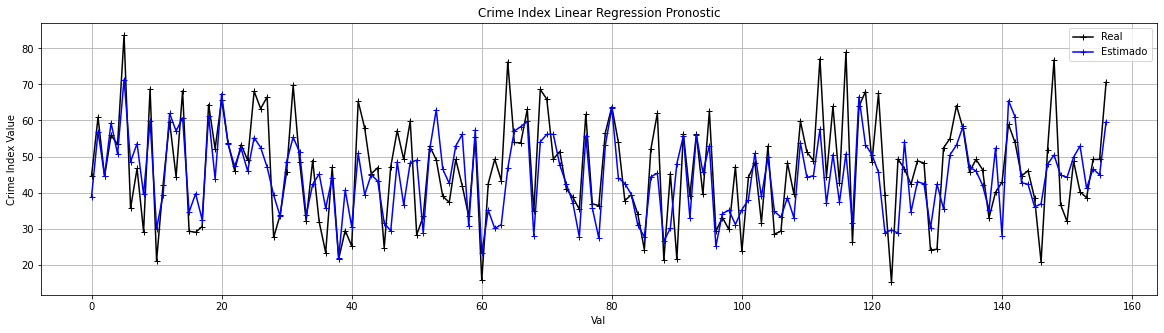

In [258]:
plt.figure(figsize=(20, 5))
plt.plot(Y_test, color='black', marker='+', label='Real')
plt.plot(Y_Pronostico, color='blue', marker='+', label='Estimado')
plt.xlabel('Val')
plt.ylabel('Crime Index Value')
plt.title('Crime Index Linear Regression Pronostic')
plt.grid(True)
plt.legend()
plt.show()

### Data does not behave on a linear fashion